# Jay Shree Krishna...........

# 

# (1) 1st Part

# EDA Part

# 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,7)
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency

In [2]:
Tit = pd.read_csv('Titanic.csv')
Tit = pd.DataFrame(Tit)
Tit.sample(10)

PassengerId  Survived  Pclass  \
796           797         1       1   
162           163         0       3   
1200         1201         1       3   
2               3         1       3   
16             17         0       3   
691           692         1       3   
758           759         0       3   
874           875         1       2   
1121         1122         0       2   
517           518         0       3   

                                            Name     Sex   Age  SibSp  Parch  \
796                  Leader, Dr. Alice (Farnham)  female  49.0      0      0   
162                   Bengtsson, Mr. John Viktor    male  26.0      0      0   
1200  Hansen, Mrs. Claus Peter (Jennie L Howard)  female  45.0      1      0   
2                         Heikkinen, Miss. Laina  female  26.0      0      0   
16                          Rice, Master. Eugene    male   2.0      4      1   
691                           Karun, Miss. Manca  female   4.0      0      1   
758                 Theobald, Mr. Thomas Leonard    male  34.0      0      0   
874        Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0      1      0   
1121                 Sweet, Mr. George Frederick    male  14.0      0      0   
517                            Ryan, Mr. Patrick    male   NaN      0      0   

                Ticket     Fare Cabin Embarked  
796              17465  25.9292   D17        S  
162             347068   7.7750   NaN        S  
1200            350026  14.1083   NaN        S  
2     STON/O2. 3101282   7.9250   NaN        S  
16              382652  29.1250   NaN        Q  
691             349256  13.4167   NaN        C  
758             363294   8.0500   NaN        S  
874          P/PP 3381  24.0000   NaN        C  
1121            220845  65.0000   NaN        S  
517             371110  24.1500   NaN        Q

In [3]:
Tit.shape

(1309, 12)

In [4]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
Tit.describe() 

PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    654.991597     0.377387     2.294882    29.881138     0.498854   
std     378.014666     0.484918     0.837836    14.413493     1.041658   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     328.000000     0.000000     2.000000    21.000000     0.000000   
50%     655.000000     0.000000     3.000000    28.000000     0.000000   
75%     982.000000     1.000000     3.000000    39.000000     1.000000   
max    1309.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

In [6]:
Tit.describe(include='O')

Name   Sex    Ticket        Cabin Embarked
count                   1309  1309      1309          295     1307
unique                  1307     2       929          186        3
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S
freq                       2   843        11            6      914

In [7]:
Tit.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
percent_missing_Tit = Tit.isnull().sum() * 100 / len(Tit)
percent_missing_Tit

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [9]:
percent_missing_Tit = Tit.isnull().sum() * 100 / len(Tit)
percent_missing_Tit.sort_values()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
Age            20.091673
Cabin          77.463713
dtype: float64

<AxesSubplot:>

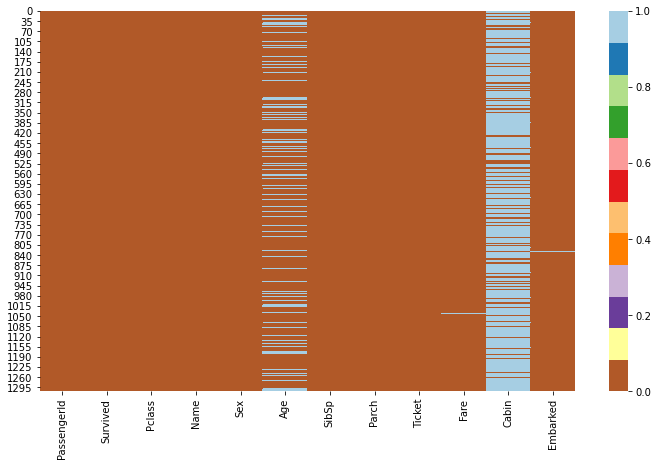

In [10]:
sns.heatmap(Tit.isnull(), cmap = 'Paired_r')

# 

# 

# Response / Target Variable

# 1) Survived

In [11]:
Tit.Survived.isnull().sum()

0

In [12]:
Tit.Survived.describe()

count    1309.000000
mean        0.377387
std         0.484918
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Survived, dtype: float64

In [13]:
Tit.Survived.value_counts()

0    815
1    494
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived - Count')

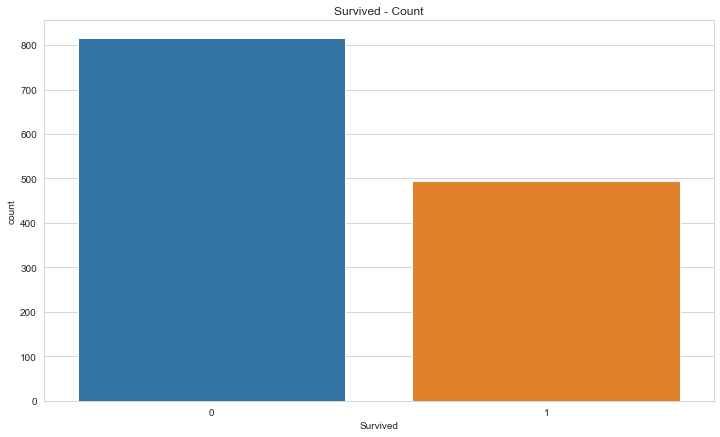

In [14]:
sns.set_style('whitegrid')
sns.countplot(Tit.Survived)
plt.title('Survived - Count')

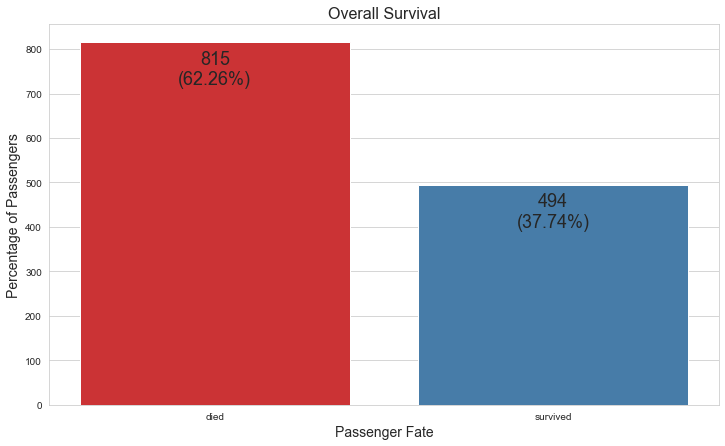

In [15]:
sns.countplot(x = 'Survived', data=Tit, palette='Set1')
plt.title('Overall Survival',fontsize= 16)
plt.xlabel('Passenger Fate',fontsize = 14)
plt.ylabel('Percentage of Passengers',fontsize = 14)
plt.axis('auto')
plt.xticks(np.arange(2), ['died', 'survived'])

labels = Tit['Survived'].value_counts()
for x, y in enumerate(labels):
    z = "{}\n({:.2%})".format(y, y/len(Tit))
    plt.text(x, y-60, str(z), ha = 'center', va='center', size = 18)
plt.show()

# 

# 

# 0) PassengerId

In [16]:
Tit.PassengerId.isnull().sum()

0

**It is only a unique column which call PassengerId**

# 

# 

# 2) Pclass

In [17]:
Tit.Pclass.isnull().sum()

0

In [18]:
Tit.Pclass.describe()

count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Pclass, dtype: float64

In [19]:
Tit.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Pclass - count')

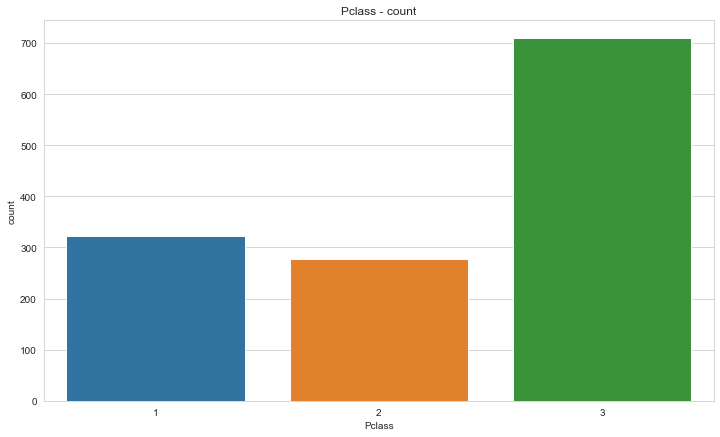

In [20]:
sns.set_style('whitegrid')
sns.countplot(Tit.Pclass)
plt.title('Pclass - count')

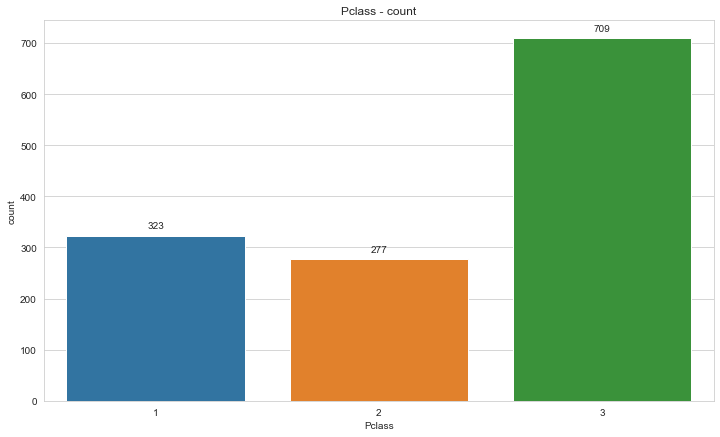

In [21]:
Pc = sns.countplot(x = Tit.Pclass)
plt.title('Pclass - count')
for p in Pc.patches:
   Pc.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [22]:
ct_Pc = pd.crosstab(Tit.Pclass, Tit.Survived)
ct_Pc

Survived    0    1
Pclass            
1         137  186
2         160  117
3         518  191

In [23]:
chi2_contingency(ct_Pc, correction = False)

(91.72367559290262,
 1.2090852275863937e-20,
 2,
 array([[201.1038961 , 121.8961039 ],
        [172.46371276, 104.53628724],
        [441.43239114, 267.56760886]]))

In [24]:
Tit.Pclass.groupby(Tit.Survived).describe()

count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         815.0  2.467485  0.765414  1.0  2.0  3.0  3.0  3.0
1         494.0  2.010121  0.874416  1.0  1.0  2.0  3.0  3.0

Text(0.5, 1.0, 'Pclass vs Survived')

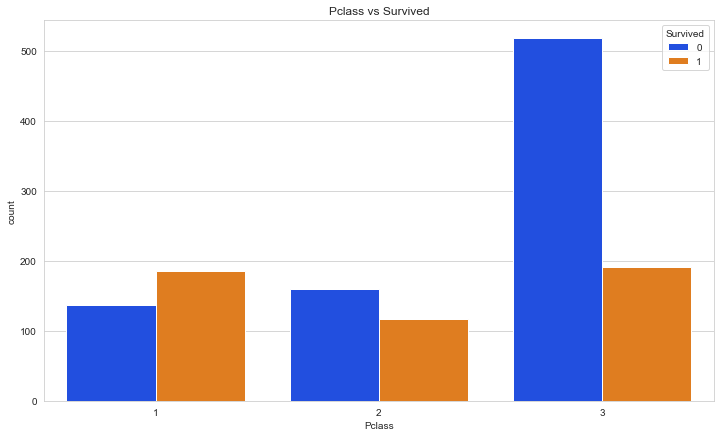

In [25]:
sns.set_style('whitegrid')
sns.countplot(Tit.Pclass, hue = Tit.Survived, palette = 'bright')
plt.title('Pclass vs Survived')

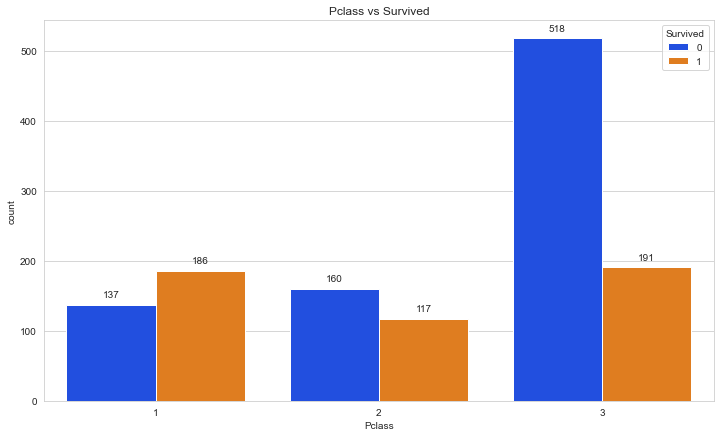

In [26]:
PcS = sns.countplot(Tit.Pclass, hue = Tit.Survived, palette = 'bright')
plt.title('Pclass vs Survived')
for p in PcS.patches:
   PcS.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**GOOD PREDICTOR**

# 

# 

# 3) Name

In [27]:
Tit.Name.isnull().sum()

0

In [28]:
Tit.Name.describe()

count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: Name, dtype: object

In [29]:
Tit.Name.value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Taussig, Mr. Emil                                      1
Kiernan, Mr. John                                      1
Elias, Mr. Dibo                                        1
                                                      ..
Holverson, Mrs. Alexander Oskar (Mary Aline Towner)    1
Sjostedt, Mr. Ernst Adolf                              1
Svensson, Mr. Johan Cervin                             1
Vovk, Mr. Janko                                        1
Allison, Miss. Helen Loraine                           1
Name: Name, Length: 1307, dtype: int64

**Almost all are unique names**

**Not Good Predictor**

# 

# 

# 4) Sex

In [30]:
Tit.Sex.isnull().sum()

0

In [31]:
Tit.Sex.describe()

count     1309
unique       2
top       male
freq       843
Name: Sex, dtype: object

In [32]:
Tit.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Sex - Count')

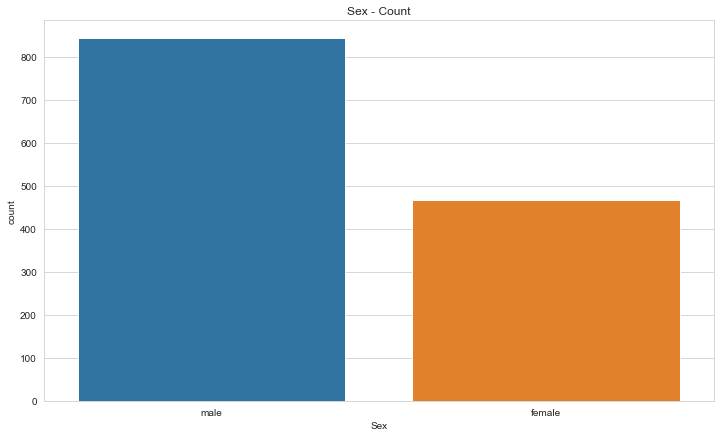

In [33]:
sns.set_style('whitegrid')
sns.countplot(Tit.Sex)
plt.title('Sex - Count')

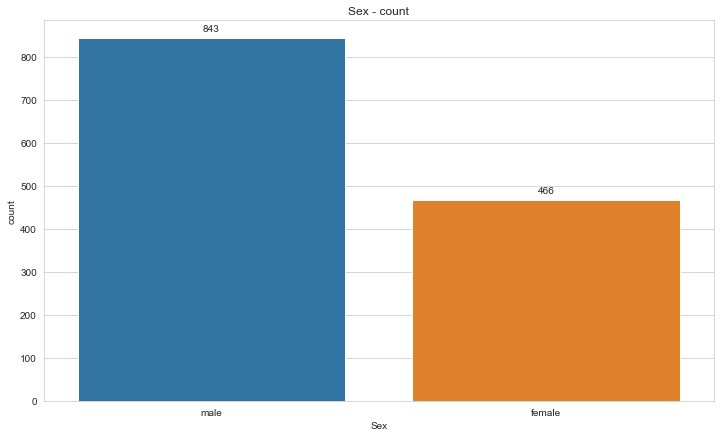

In [34]:
Se = sns.countplot(x = Tit.Sex)
plt.title('Sex - count')
for p in Se.patches:
   Se.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [35]:
ct_S = pd.crosstab(Tit.Sex, Tit.Survived)
ct_S

Survived    0    1
Sex               
female     81  385
male      734  109

In [36]:
chi2_contingency(ct_S, correction = False)

(620.275681790394,
 6.513244629920191e-137,
 1,
 array([[290.13750955, 175.86249045],
        [524.86249045, 318.13750955]]))

In [37]:
Tit.Sex.groupby(Tit.Survived).describe()

count unique     top freq
Survived                          
0          815      2    male  734
1          494      2  female  385

Text(0.5, 1.0, 'Sex vs Survived')

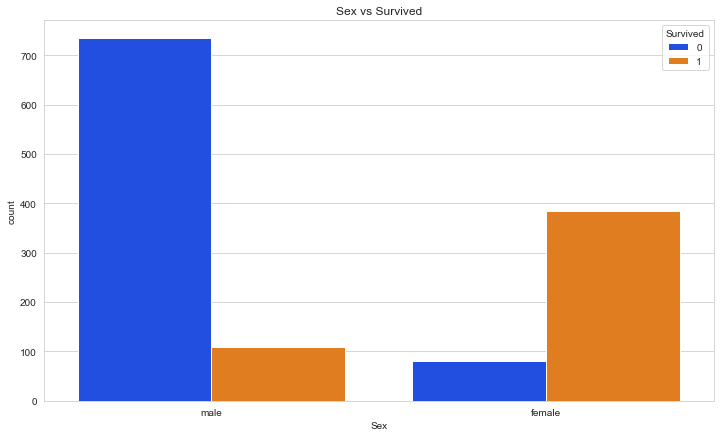

In [38]:
sns.set_style('whitegrid')
sns.countplot(Tit.Sex, hue = Tit.Survived, palette = 'bright')
plt.title('Sex vs Survived')

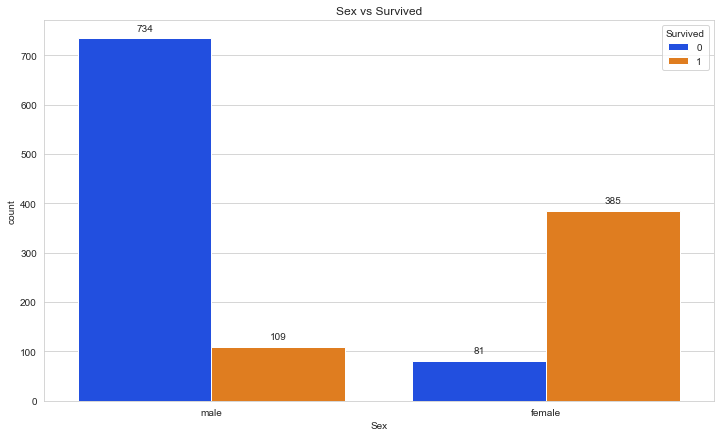

In [39]:
SeS = sns.countplot(Tit.Sex, hue = Tit.Survived, palette = 'bright')
plt.title('Sex vs Survived')
for p in SeS.patches:
   SeS.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**GOOD PREDICTOR**

# 

# 

# 5) Age

In [40]:
Tit.Age.isnull().sum()

263

In [41]:
Tit.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [42]:
Tit.Age.value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
20.50     1
11.50     1
22.50     1
0.33      1
60.50     1
Name: Age, Length: 98, dtype: int64

In [43]:
Tit.Age.sample(10)

253     30.0
409      NaN
519     32.0
50       7.0
14      14.0
1086    33.0
915     48.0
83      28.0
1017    22.0
995     16.0
Name: Age, dtype: float64

# 

**We want to fill in missing age data instead of just dropping the missing age data rows.**

**One way to do this by filling in the mean age of all the passengers(imputation).**

**However we can be smarter about this and check the average age by PClass**

# **For Example:..........**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

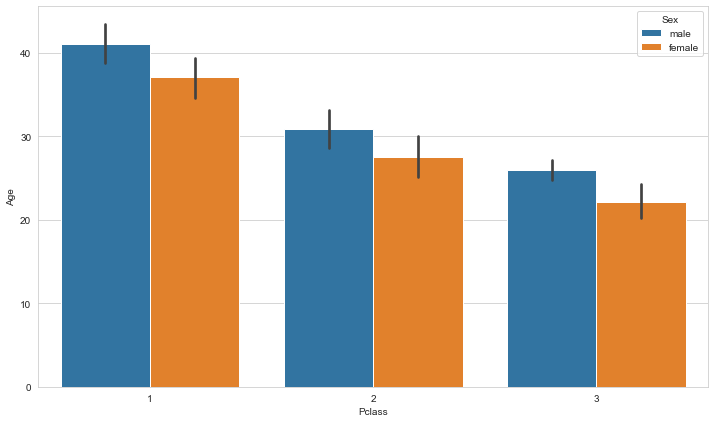

In [44]:
sns.barplot(data=Tit, x='Pclass',y='Age',hue='Sex')

In [45]:
meanAgeMale = round(Tit[(Tit['Sex'] == "male")]['Age'].groupby(Tit['Pclass']).mean(),2)
meanAgeFeMale = round(Tit[(Tit['Sex'] == "female")]['Age'].groupby(Tit['Pclass']).mean(),2)

In [46]:
print('\n\t\tMEAN AGE PER SEX PER PCLASS')
print(pd.concat([meanAgeMale, meanAgeFeMale], axis = 1,keys= ['Male','Female']))


		MEAN AGE PER SEX PER PCLASS
         Male  Female
Pclass               
1       41.03   37.04
2       30.82   27.50
3       25.96   22.19


# 

**We can see the wealthier passengers in the higher classes tend to be order. which makes sense.**

# **We'll use thease average age values to impute based on Pclass for Age**

In [47]:
def age_fillna(cols):
    Age     = cols[0]
    Pclass  = cols[1]
    Sex     = cols[2]
    
    if pd.isnull(Age):
        if Sex == 'male':
            if Pclass == 1:
                return 41.03
            if Pclass == 2:
                return 30.82
            if Pclass == 3:
                return 25.96

        if Sex == 'female':
            if Pclass == 1:
                return 37.04
            if Pclass == 2:
                return 27.50
            if Pclass == 3:
                return 22.19
    else:
        return Age

In [48]:
Tit['Age'] = Tit[['Age','Pclass','Sex']].apply(age_fillna, axis=1)

In [49]:
Tit.Age.isnull().sum()

0

In [50]:
Tit.Age.describe()

count    1309.000000
mean       29.376249
std        13.168985
min         0.170000
25%        22.000000
50%        26.000000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

In [51]:
Tit.Age.value_counts()

25.96    144
22.19     64
24.00     47
22.00     43
21.00     41
        ... 
80.00      1
0.67       1
74.00      1
38.50      1
60.50      1
Name: Age, Length: 104, dtype: int64

Text(0.5, 1.0, 'Age')

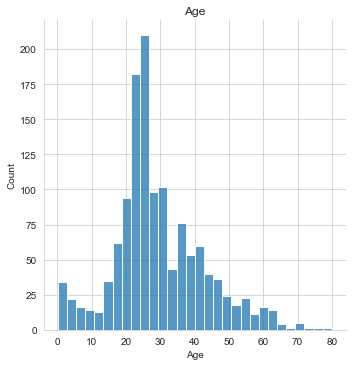

In [52]:
sns.set_style('whitegrid')
sns.displot(Tit.Age)
plt.title('Age')

Text(0.5, 1.0, 'Age')

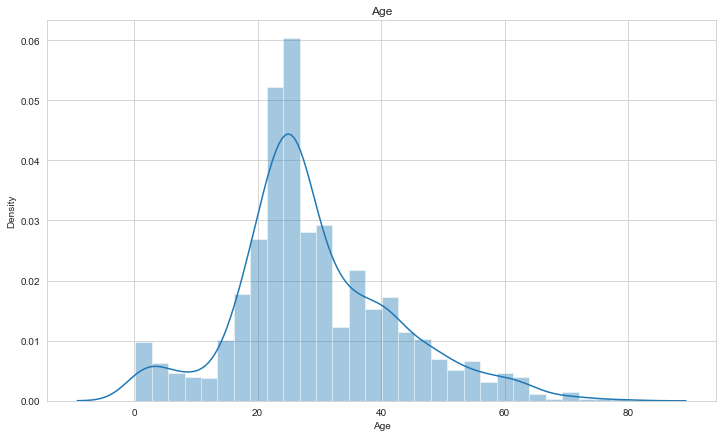

In [53]:
sns.set_style('whitegrid')
sns.distplot(Tit.Age)
plt.title('Age')

Text(0.5, 1.0, 'Age - Count')

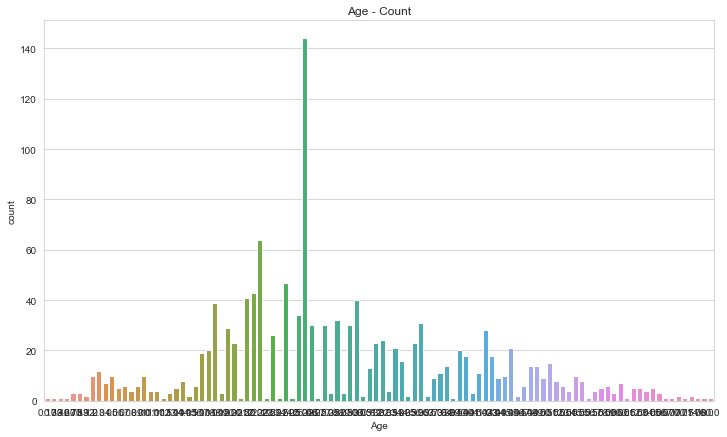

In [54]:
sns.set_style('whitegrid')
sns.countplot(Tit.Age)
plt.title('Age - Count')

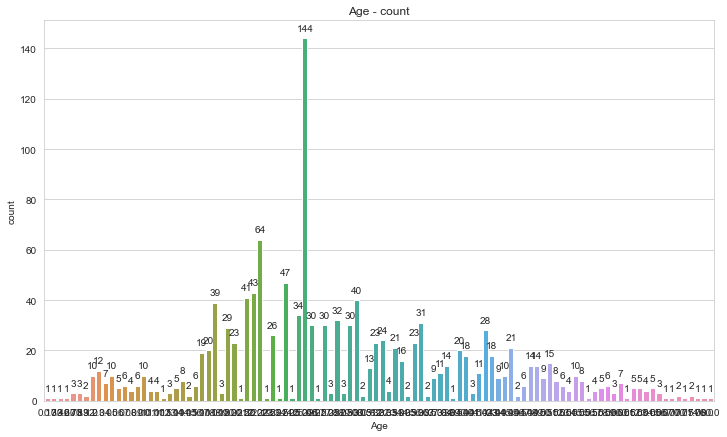

In [55]:
Ag = sns.countplot(x = Tit.Age)
plt.title('Age - count')
for p in Ag.patches:
   Ag.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Text(0.5, 1.0, 'Box Plot of Age')

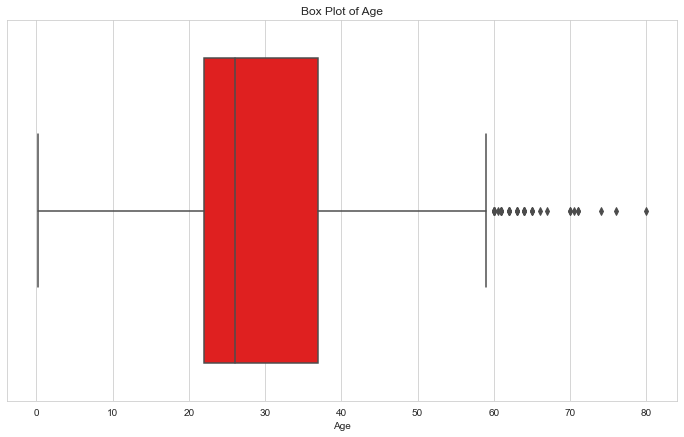

In [56]:
sns.set_style('whitegrid')
sns.boxplot(Tit.Age, color = 'r')
plt.title('Box Plot of Age')

In [57]:
Q3_A = Tit.Age.quantile(0.75)
Q3_A

37.0

In [58]:
Q1_A = Tit.Age.quantile(0.25)
Q1_A

22.0

In [59]:
IQR_A = Q3_A - Q1_A
IQR_A

15.0

In [60]:
UL_A = Q3_A + (1.5 * IQR_A)
UL_A

59.5

In [61]:
LL_A = Q1_A - (1.5 * IQR_A)
LL_A

-0.5

In [62]:
Tit.Age[(Tit.Age > UL_A)].value_counts().sum()

40

In [63]:
Tit.Age[(Tit.Age < LL_A)].value_counts().sum()

0

In [64]:
Tit['Age'] = np.where(Tit['Age'] > UL_A, UL_A, Tit['Age'])

Text(0.5, 1.0, 'Box Plot of Age')

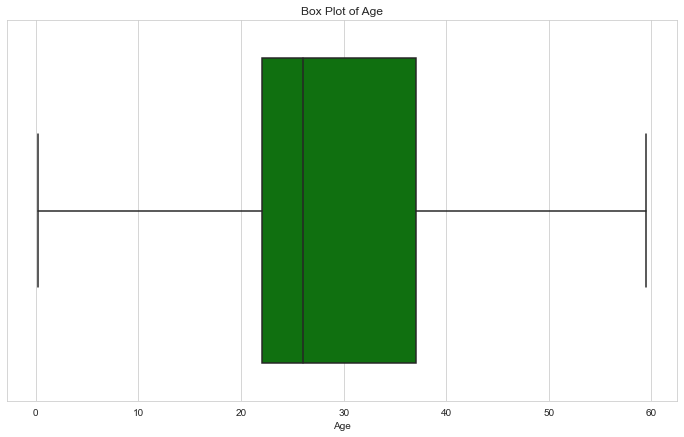

In [65]:
sns.set_style('whitegrid')
sns.boxplot(Tit.Age, color = 'g')
plt.title('Box Plot of Age')

Text(0.5, 1.0, 'Age')

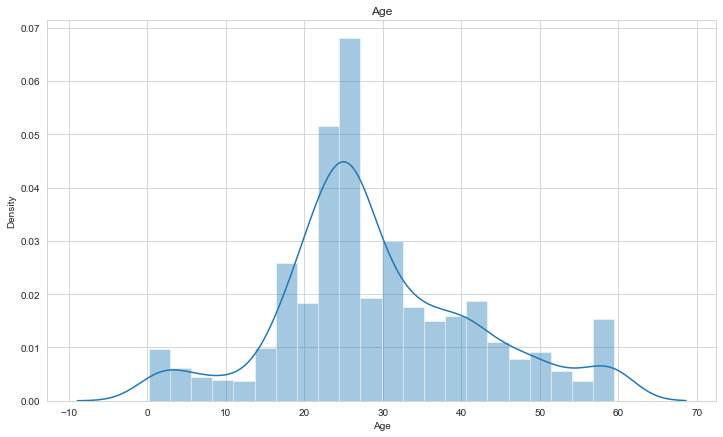

In [66]:
sns.set_style('whitegrid')
sns.distplot(Tit.Age)
plt.title('Age')

In [67]:
Tit.Age.groupby(Tit.Survived).describe()

count       mean        std   min    25%    50%    75%   max
Survived                                                              
0         815.0  29.720184  12.074688  0.33  22.19  25.96  36.75  59.5
1         494.0  28.408016  13.791738  0.17  22.00  27.00  36.75  59.5

In [68]:
S_0 = Tit[Tit.Survived == 0]
S_1 = Tit[Tit.Survived == 1]
scipy.stats.ttest_ind(S_0.Age, S_1.Age)

Ttest_indResult(statistic=1.8049575830876017, pvalue=0.07131138929577087)

In [69]:
mod_A = ols('Survived ~ Age', data = Tit).fit()
sm.stats.anova_lm(mod_A)

df      sum_sq   mean_sq         F    PR(>F)
Age          1.0    0.764755  0.764755  3.257872  0.071311
Residual  1307.0  306.805910  0.234741       NaN       NaN

**NOT GOOD PREDICTOR**

# 

# 

# 6) SibSp

In [70]:
Tit.SibSp.isnull().sum()

0

In [71]:
Tit.SibSp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

In [72]:
Tit.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

Text(0.5, 1.0, 'SibSp - Count')

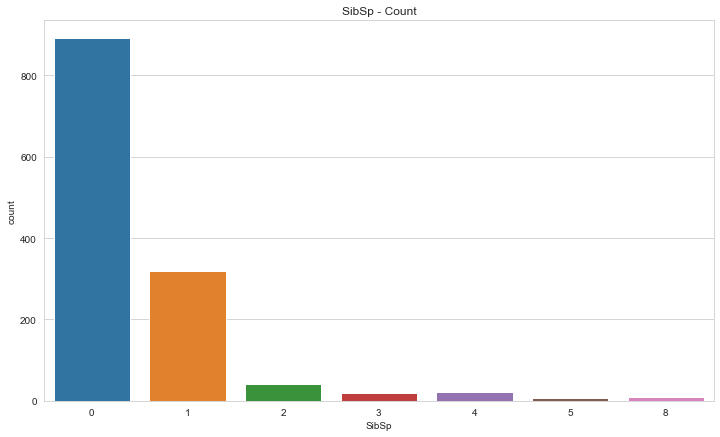

In [73]:
sns.set_style('whitegrid')
sns.countplot(Tit.SibSp)
plt.title('SibSp - Count')

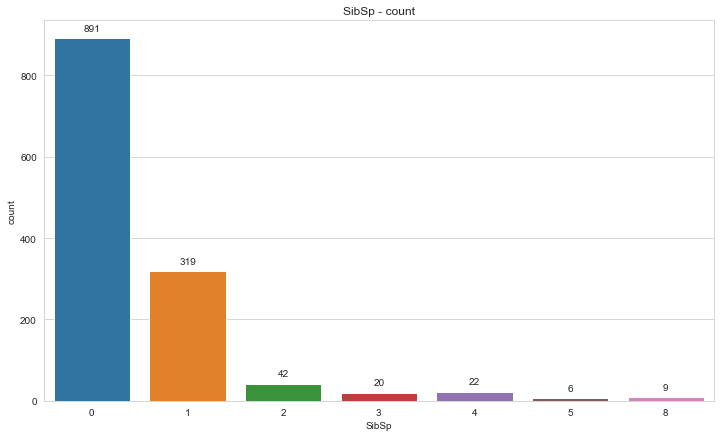

In [74]:
Sib = sns.countplot(x = Tit.SibSp)
plt.title('SibSp - count')
for p in Sib.patches:
   Sib.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [75]:
ct_SS = pd.crosstab(Tit.SibSp, Tit.Survived)
ct_SS

Survived    0    1
SibSp             
0         593  298
1         153  166
2          23   19
3          15    5
4          18    4
5           5    1
8           8    1

In [76]:
chi2_contingency(ct_SS, correction = False)

(44.56466707061879,
 5.711220964599268e-08,
 6,
 array([[554.74789916, 336.25210084],
        [198.61344538, 120.38655462],
        [ 26.14973262,  15.85026738],
        [ 12.45225363,   7.54774637],
        [ 13.69747899,   8.30252101],
        [  3.73567609,   2.26432391],
        [  5.60351413,   3.39648587]]))

In [77]:
Tit.SibSp.groupby(Tit.Survived).describe()

count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         815.0  0.496933  1.164452  0.0  0.0  0.0  1.0  8.0
1         494.0  0.502024  0.799972  0.0  0.0  0.0  1.0  8.0

Text(0.5, 1.0, 'SibSp vs Survived')

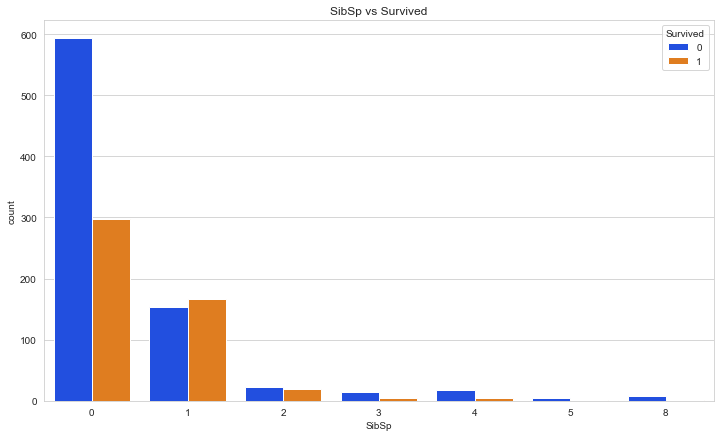

In [78]:
sns.set_style('whitegrid')
sns.countplot(Tit.SibSp, hue = Tit.Survived, palette = 'bright')
plt.title('SibSp vs Survived')

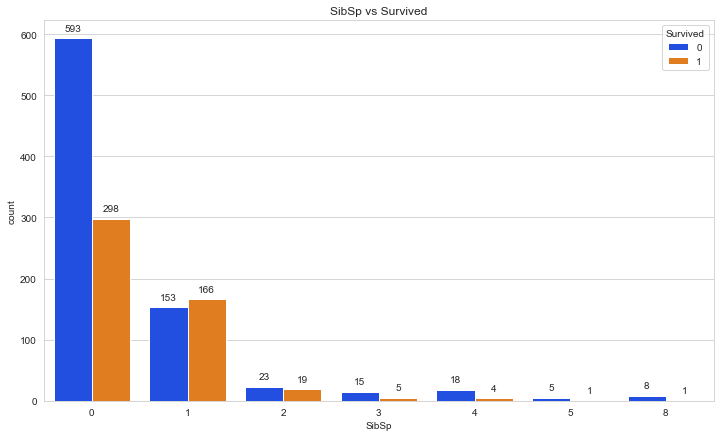

In [79]:
SibS = sns.countplot(Tit.SibSp, hue = Tit.Survived, palette = 'bright')
plt.title('SibSp vs Survived')
for p in SibS.patches:
   SibS.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**GOOD PREDICTOR**

# 

# 

# 7) Parch

In [80]:
Tit.Parch.isnull().sum()

0

In [81]:
Tit.Parch.describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

In [82]:
Tit.Parch.value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Parch - Count')

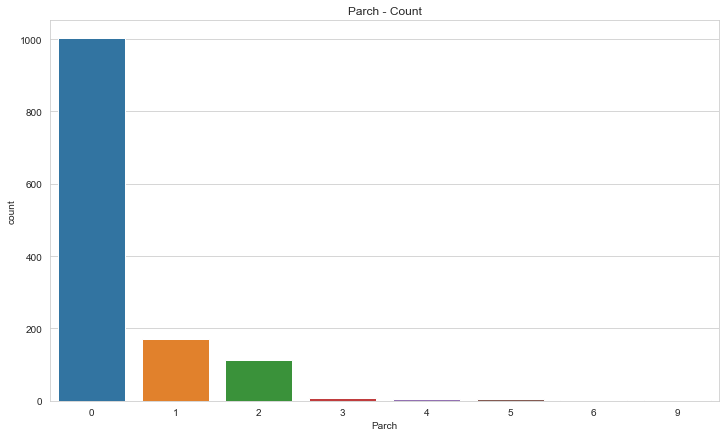

In [83]:
sns.set_style('whitegrid')
sns.countplot(Tit.Parch)
plt.title('Parch - Count')

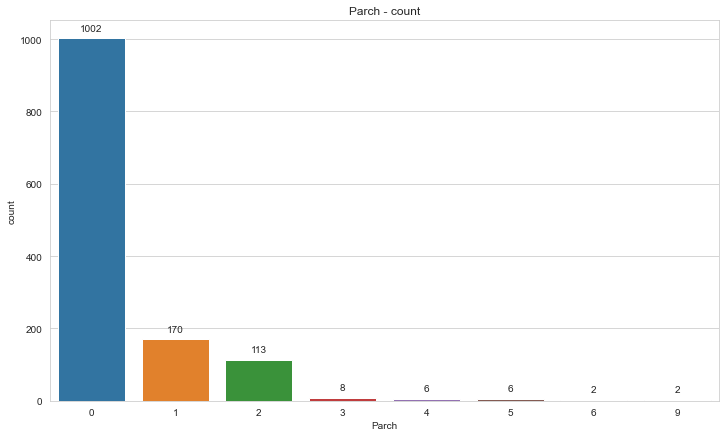

In [84]:
Pa = sns.countplot(x = Tit.Parch)
plt.title('Parch - count')
for p in Pa.patches:
   Pa.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [85]:
ct_Pa = pd.crosstab(Tit.Parch, Tit.Survived)
ct_Pa

Survived    0    1
Parch             
0         670  332
1          77   93
2          53   60
3           3    5
4           4    2
5           5    1
6           2    0
9           1    1

In [86]:
chi2_contingency(ct_Pa, correction = False)

(45.827318305767996,
 9.4450466826663e-08,
 7,
 array([[623.8579068 , 378.1420932 ],
        [105.84415584,  64.15584416],
        [ 70.355233  ,  42.644767  ],
        [  4.98090145,   3.01909855],
        [  3.73567609,   2.26432391],
        [  3.73567609,   2.26432391],
        [  1.24522536,   0.75477464],
        [  1.24522536,   0.75477464]]))

In [87]:
Tit.Parch.groupby(Tit.Survived).describe()

count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         815.0  0.311656  0.843270  0.0  0.0  0.0  0.0  9.0
1         494.0  0.506073  0.888833  0.0  0.0  0.0  1.0  9.0

Text(0.5, 1.0, 'Parch vs Survived')

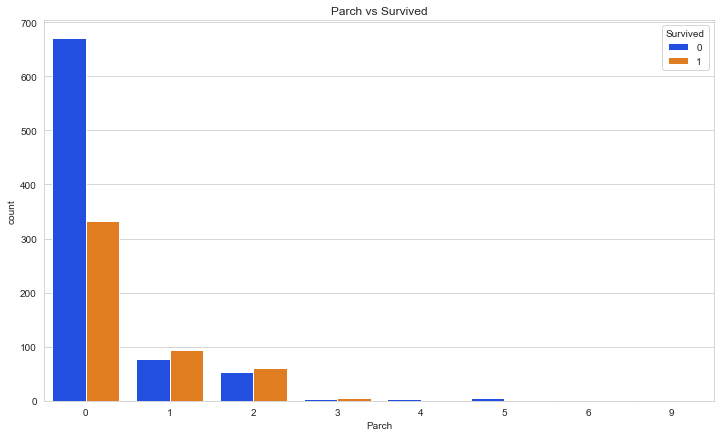

In [88]:
sns.set_style('whitegrid')
sns.countplot(Tit.Parch, hue = Tit.Survived, palette = 'bright')
plt.title('Parch vs Survived')

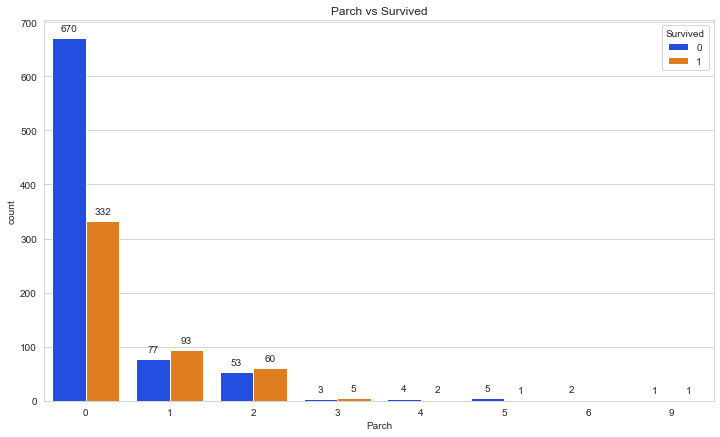

In [89]:
PaS = sns.countplot(Tit.Parch, hue = Tit.Survived, palette = 'bright')
plt.title('Parch vs Survived')
for p in PaS.patches:
   PaS.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**GOOD PREDICTOR**

# 

# 

# 8) Ticket

In [90]:
Tit.Ticket.isnull().sum()

0

**It is a Ticket Column**

**Which unique for every Passengers**

# 

# 

# 9) Fare

In [91]:
Tit.Fare.isnull().sum()

1

In [92]:
Tit.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [93]:
Tit.Fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
4.0125      1
25.5875     1
12.2750     1
8.6833      1
32.3208     1
Name: Fare, Length: 281, dtype: int64

In [94]:
Tit.Fare.sample(10)

911      59.4000
145      36.7500
315       7.8542
580      30.0000
976      14.4542
1302     90.0000
645      76.7292
1090      8.1125
1075    247.5208
376       7.2500
Name: Fare, dtype: float64

In [95]:
Tit["Fare"].fillna(Tit["Fare"].median(), inplace = True)

In [96]:
Tit.Fare.isnull().sum()

0

In [97]:
Tit.Fare.describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fare')

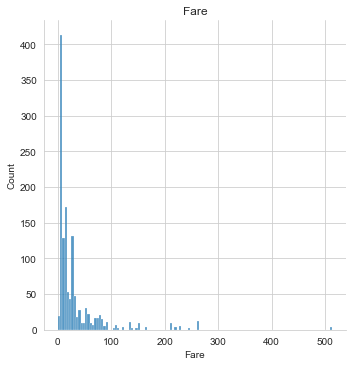

In [98]:
sns.set_style('whitegrid')
sns.displot(Tit.Fare)
plt.title('Fare')

Text(0.5, 1.0, 'Fare')

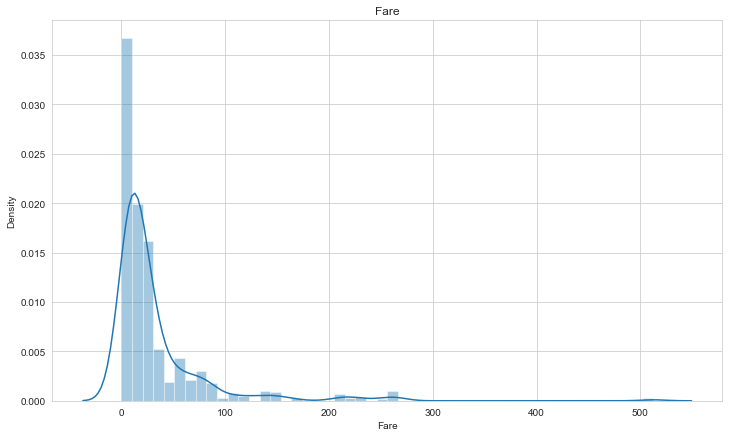

In [99]:
sns.set_style('whitegrid')
sns.distplot(Tit.Fare)
plt.title('Fare')

Text(0.5, 1.0, 'Fare - Count')

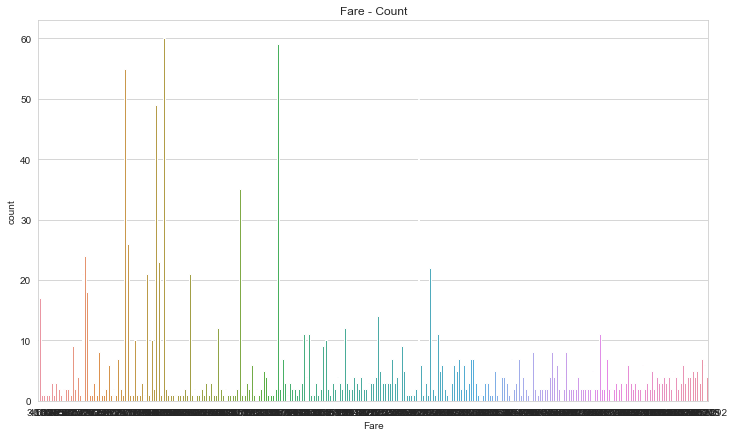

In [100]:
sns.set_style('whitegrid')
sns.countplot(Tit.Fare)
plt.title('Fare - Count')

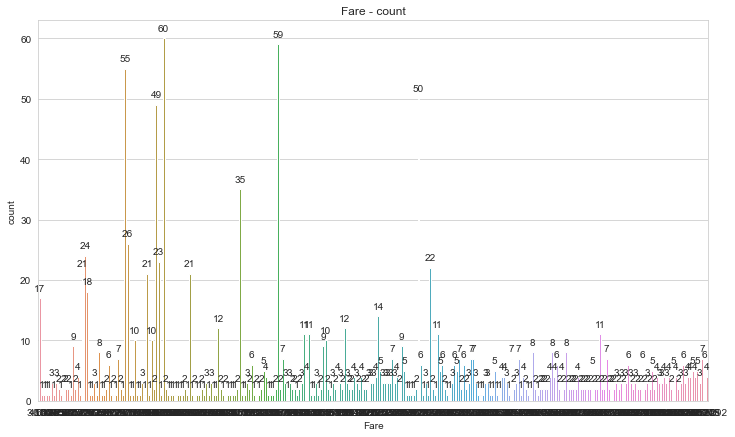

In [101]:
Fa = sns.countplot(x = Tit.Fare)
plt.title('Fare - count')
for p in Fa.patches:
   Fa.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Text(0.5, 1.0, 'Box Plot of Fare')

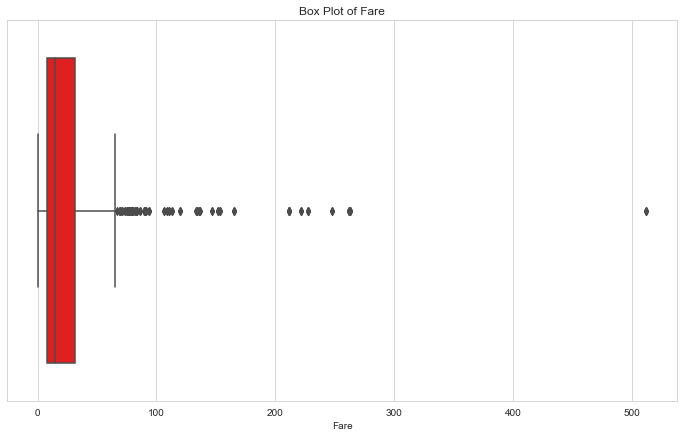

In [102]:
sns.set_style('whitegrid')
sns.boxplot(Tit.Fare, color = 'r')
plt.title('Box Plot of Fare')

In [103]:
Q3_Fa = Tit.Fare.quantile(0.75)
Q3_Fa

31.275

In [104]:
Q1_Fa = Tit.Fare.quantile(0.25)
Q1_Fa

7.8958

In [105]:
IQR_Fa = Q3_Fa - Q1_Fa
IQR_Fa

23.379199999999997

In [106]:
UL_Fa = Q3_Fa + (1.5 * IQR_Fa)
UL_Fa

66.34379999999999

In [107]:
LL_Fa = Q1_Fa - (1.5 * IQR_Fa)
LL_Fa

-27.172999999999995

In [108]:
Tit.Fare[(Tit.Fare > UL_Fa)].value_counts().sum()

171

In [109]:
Tit.Fare[(Tit.Fare < LL_Fa)].value_counts().sum()

0

In [110]:
Tit.Fare[(Tit.Fare > 200)].value_counts().sum()

38

In [111]:
Tit['Fare'] = np.where(Tit['Fare'] > UL_Fa, UL_Fa, Tit['Fare'])

Text(0.5, 1.0, 'Box Plot of Fare')

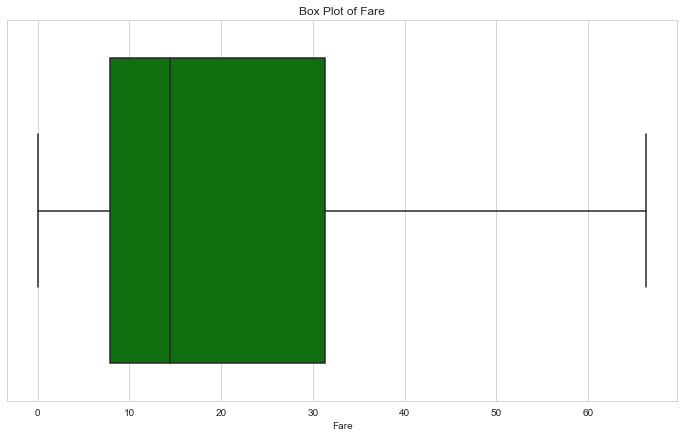

In [112]:
sns.set_style('whitegrid')
sns.boxplot(Tit.Fare, color = 'g')
plt.title('Box Plot of Fare')

Text(0.5, 1.0, 'Fare')

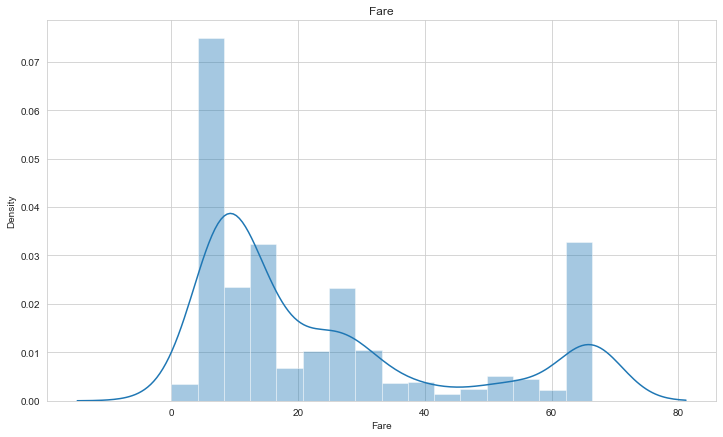

In [113]:
sns.set_style('whitegrid')
sns.distplot(Tit.Fare)
plt.title('Fare')

In [114]:
Tit.Fare.groupby(Tit.Survived).describe()

count       mean        std  min        25%   50%      75%      max
Survived                                                                     
0         815.0  19.735307  17.970321  0.0   7.854200  10.5  26.0000  66.3438
1         494.0  31.777019  22.869941  0.0  11.431275  26.0  56.9823  66.3438

In [115]:
S_0 = Tit[Tit.Survived == 0]
S_1 = Tit[Tit.Survived == 1]
scipy.stats.ttest_ind(S_0.Fare, S_1.Fare)

Ttest_indResult(statistic=-10.580231540336698, pvalue=3.7047341359594093e-25)

Text(0.5, 1.0, 'Fare vs Survived')

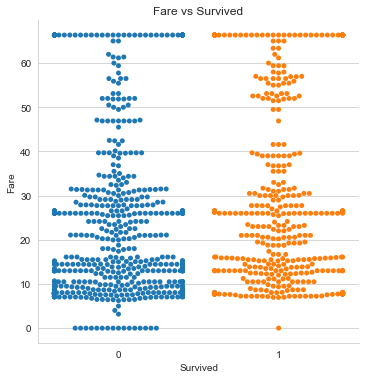

In [116]:
sns.set_style('whitegrid')
sns.catplot(x = 'Survived', y ='Fare', kind = 'swarm', data = Tit)
plt.title('Fare vs Survived')

Text(0.5, 1.0, 'Fare vs Survived')

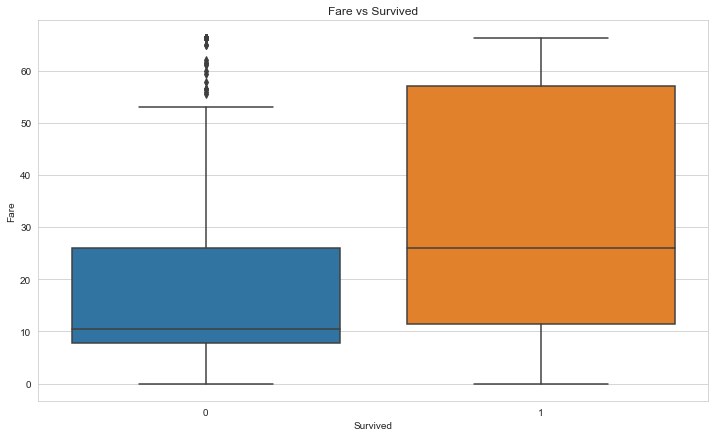

In [117]:
sns.set_style('whitegrid')
sns.boxplot(x = 'Survived', y ='Fare', data = Tit)
plt.title('Fare vs Survived')

**GOOD PREDICTOR**

# 

# 

# 10) Cabin

In [118]:
Tit.Cabin.isnull().sum()

1014

In [119]:
percent_missing_Cabin = Tit.Cabin.isnull().sum() * 100 / len(Tit)
print("Percent Of Missing Value In Cabin Column is {}% .".format(percent_missing_Cabin))

Percent Of Missing Value In Cabin Column is 77.46371275783041% .


**Here, In Cabin column there are 77% Null Values**

**So, we can't take this column for building model**

# 

# 

# 11) Embarked

In [120]:
Tit.Embarked.isnull().sum()

2

In [121]:
Tit.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [122]:
Tit.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [123]:
Tit['Embarked'].mode()

0    S
dtype: object

In [124]:
Tit['Embarked'].fillna(Tit['Embarked'].value_counts().index[0], inplace=True)

In [125]:
Tit.Embarked.isnull().sum()

0

In [126]:
Tit.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Embarked - Count')

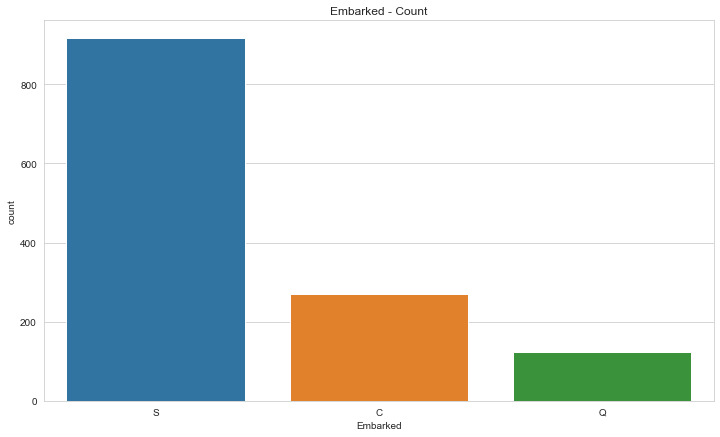

In [127]:
sns.countplot(Tit.Embarked)
plt.title('Embarked - Count')

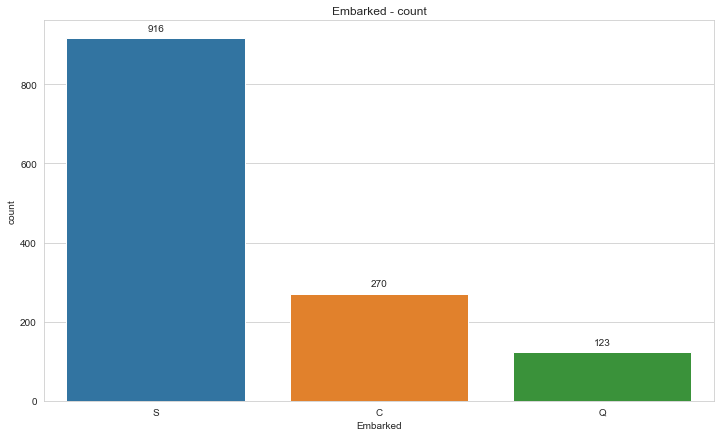

In [128]:
Em = sns.countplot(x = Tit.Embarked)
plt.title('Embarked - count')
for p in Em.patches:
   Em.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [129]:
ct_Em = pd.crosstab(Tit.Embarked, Tit.Survived)
ct_Em

Survived    0    1
Embarked          
C         137  133
Q          69   54
S         609  307

In [130]:
chi2_contingency(ct_Em, correction = False)

(24.19377595554332,
 5.5768415194448465e-06,
 2,
 array([[168.10542399, 101.89457601],
        [ 76.58135982,  46.41864018],
        [570.3132162 , 345.6867838 ]]))

In [131]:
Tit.Embarked.groupby(Tit.Survived).describe()

count unique top freq
Survived                      
0          815      3   S  609
1          494      3   S  307

Text(0.5, 1.0, 'Embarked vs Survived')

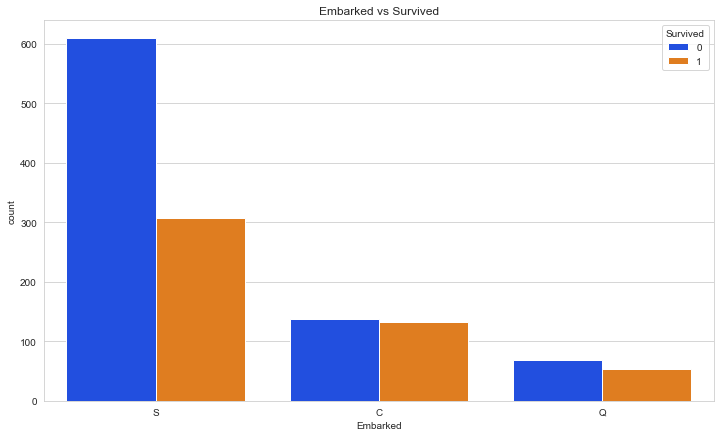

In [132]:
sns.countplot(Tit.Embarked, hue = Tit.Survived, palette = 'bright')
plt.title('Embarked vs Survived')

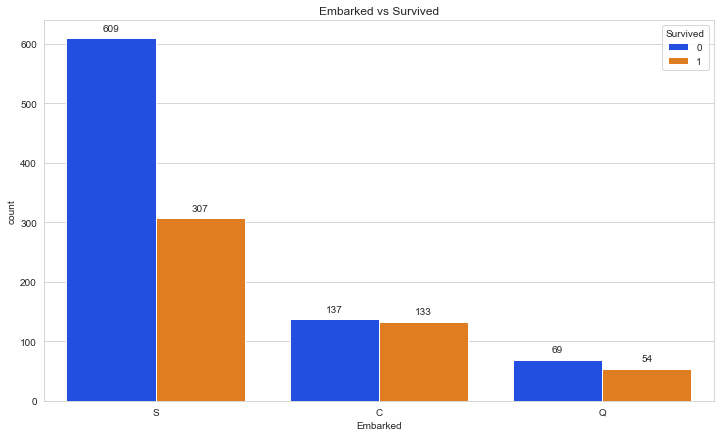

In [133]:
EmS = sns.countplot(Tit.Embarked, hue = Tit.Survived, palette = 'bright')
plt.title('Embarked vs Survived')
for p in EmS.patches:
   EmS.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()), 
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**GOOD PREDICTOR**

# 

# 

# Good Predictor As per P-Value

**Pclass**

**Sex**

**SibSp**

**Parch**

**Fare**

**Embarked**

# NOT Good Predictor As per P-Value

**PassengerId**

**Name**

**Age**

**Ticket**

**Cabin**

# 

# 

# 

# 

# 

# (2) 2nd Part

# Linear Regression Model (OLS)

# 

In [134]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


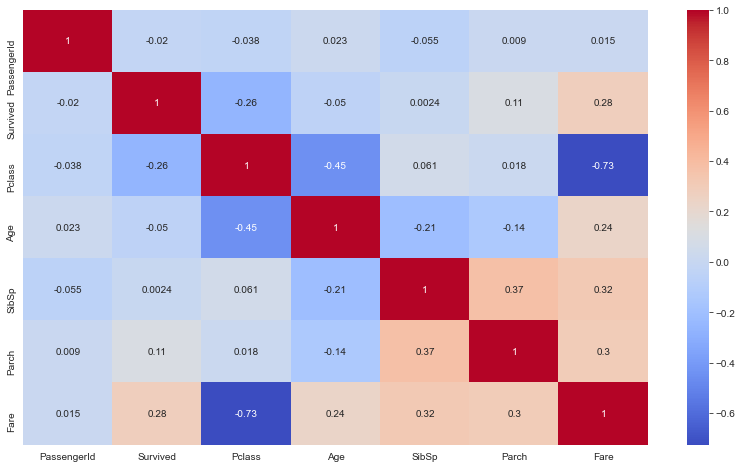

In [135]:
plt.figure(figsize=(14,8))
sns.heatmap(Tit.corr(),annot=True,cmap='coolwarm')
plt.show()

# 

In [136]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [137]:
import scipy
from scipy import stats
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 

# OLS With Good Predictors

In [138]:
model = smf.ols(formula='Survived ~ Pclass + Sex + SibSp + Parch + Fare + Embarked',data = Tit).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 16 Nov 2021   Prob (F-statistic):          6.69e-198
Time:                        13:23:22   Log-Likelihood:                -439.25
No. Observations:                1309   AIC:                             894.5
Df Residuals:                    1301   BIC:                             935.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9868      0.064     15.428

# 

# 

# OLS With All Rows

In [139]:
model2 = smf.ols(formula='Survived ~ PassengerId + Pclass + Name + Sex + Age + SibSp + Parch + Ticket + Fare + Cabin + Embarked',data = Tit).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 16 Nov 2021   Prob (F-statistic):                nan
Time:                        13:23:22   Log-Likelihood:                 8195.1
No. Observations:                 295   AIC:                        -1.580e+04
Df Residuals:                       0   BIC:                        -1.471e+04
Df Model:                         294                                         
Covariance Type:            nonrobust                                         
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

# 

# 

# OLS Without Name, Ticket  And Cabin Column

In [140]:
model3 = smf.ols(formula='Survived ~ PassengerId + Pclass + Sex + Age + SibSp + Parch + Fare + Embarked',data = Tit).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     158.7
Date:                Tue, 16 Nov 2021   Prob (F-statistic):          3.52e-202
Time:                        13:23:24   Log-Likelihood:                -423.93
No. Observations:                1309   AIC:                             867.9
Df Residuals:                    1299   BIC:                             919.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2072      0.075     16.029

# 

# 

# P < 0.05 Columns To OLS Model

In [141]:
model4 = smf.ols(formula='Survived ~ Pclass + Age + Sex + SibSp',data = Tit).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     354.2
Date:                Tue, 16 Nov 2021   Prob (F-statistic):          1.88e-206
Time:                        13:23:24   Log-Likelihood:                -428.10
No. Observations:                1309   AIC:                             866.2
Df Residuals:                    1304   BIC:                             892.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2657      0.047     26.920      

# 

# 

In [142]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [143]:
Good_Var = Tit[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Good_Var

Pclass     Sex  SibSp  Parch     Fare Embarked
0          3    male      1      0   7.2500        S
1          1  female      1      0  66.3438        C
2          3  female      0      0   7.9250        S
3          1  female      1      0  53.1000        S
4          3    male      0      0   8.0500        S
...      ...     ...    ...    ...      ...      ...
1304       3    male      0      0   8.0500        S
1305       1  female      0      0  66.3438        C
1306       3    male      0      0   7.2500        S
1307       3    male      0      0   8.0500        S
1308       3    male      1      1  22.3583        C

[1309 rows x 6 columns]

In [144]:
Res_Var = Tit[['Survived']] 
Res_Var

Survived
0            0
1            1
2            1
3            1
4            0
...        ...
1304         0
1305         1
1306         0
1307         0
1308         0

[1309 rows x 1 columns]

In [145]:
dummy_Sex = pd.get_dummies(Good_Var.Sex, drop_first = True, prefix = 'Sex') 
dummy_Sex.sample(10)

Sex_male
860          1
1052         1
10           0
727          0
1047         0
256          0
739          1
1199         1
219          1
751          1

In [146]:
Good_Var_dummy = Good_Var.join(dummy_Sex)
Good_Var_dummy

Pclass     Sex  SibSp  Parch     Fare Embarked  Sex_male
0          3    male      1      0   7.2500        S         1
1          1  female      1      0  66.3438        C         0
2          3  female      0      0   7.9250        S         0
3          1  female      1      0  53.1000        S         0
4          3    male      0      0   8.0500        S         1
...      ...     ...    ...    ...      ...      ...       ...
1304       3    male      0      0   8.0500        S         1
1305       1  female      0      0  66.3438        C         0
1306       3    male      0      0   7.2500        S         1
1307       3    male      0      0   8.0500        S         1
1308       3    male      1      1  22.3583        C         1

[1309 rows x 7 columns]

In [147]:
Good_Var_dummy.drop(['Sex'], axis = 1, inplace = True)

In [148]:
Good_Var_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   SibSp     1309 non-null   int64  
 2   Parch     1309 non-null   int64  
 3   Fare      1309 non-null   float64
 4   Embarked  1309 non-null   object 
 5   Sex_male  1309 non-null   uint8  
dtypes: float64(1), int64(3), object(1), uint8(1)
memory usage: 52.5+ KB


# 

In [149]:
dummy_Embarked = pd.get_dummies(Good_Var_dummy.Embarked, drop_first = True, prefix = 'Embarked') 
dummy_Embarked.sample(10)

Embarked_Q  Embarked_S
522            0           0
292            0           0
1007           0           0
255            0           0
796            0           1
1146           0           1
512            0           1
766            0           0
862            0           1
453            0           0

In [150]:
Good_Var_dummy = Good_Var_dummy.join(dummy_Embarked)
Good_Var_dummy.sample(10)

Pclass  SibSp  Parch     Fare Embarked  Sex_male  Embarked_Q  Embarked_S
617        3      1      0  16.1000        S         0           0           1
452        1      0      0  27.7500        C         1           0           0
683        3      5      2  46.9000        S         1           0           1
878        3      0      0   7.8958        S         1           0           1
1273       3      0      0  14.5000        S         0           0           1
333        3      2      0  18.0000        S         1           0           1
80         3      0      0   9.0000        S         1           0           1
911        1      1      0  59.4000        C         1           0           0
809        1      1      0  53.1000        S         0           0           1
522        3      0      0   7.2250        C         1           0           0

In [151]:
Good_Var_dummy.drop(['Embarked'], axis = 1, inplace = True)

In [152]:
Good_Var_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   SibSp       1309 non-null   int64  
 2   Parch       1309 non-null   int64  
 3   Fare        1309 non-null   float64
 4   Sex_male    1309 non-null   uint8  
 5   Embarked_Q  1309 non-null   uint8  
 6   Embarked_S  1309 non-null   uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 44.9 KB


In [153]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [154]:
lm.fit(Good_Var_dummy, Res_Var)

LinearRegression()

In [155]:
yhatt = lm.predict(Good_Var_dummy)

In [156]:
print("The R-square is: ", round(lm.score(Good_Var_dummy, Res_Var), 3))
print("")
print("Intercept", lm.intercept_)
print("")
print("Coefficient", lm.coef_)

The R-square is:  0.512

Intercept [0.98679999]

Coefficient [[-0.07443087 -0.03440594 -0.01124329  0.0015067  -0.67485653  0.00850933
  -0.02841248]]


In [157]:
Good_Var_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   SibSp       1309 non-null   int64  
 2   Parch       1309 non-null   int64  
 3   Fare        1309 non-null   float64
 4   Sex_male    1309 non-null   uint8  
 5   Embarked_Q  1309 non-null   uint8  
 6   Embarked_S  1309 non-null   uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 44.9 KB


In [158]:
Good_Var_dummy_R = Good_Var_dummy.join(Res_Var)
Good_Var_dummy_R

Pclass  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0          3      1      0   7.2500         1           0           1   
1          1      1      0  66.3438         0           0           0   
2          3      0      0   7.9250         0           0           1   
3          1      1      0  53.1000         0           0           1   
4          3      0      0   8.0500         1           0           1   
...      ...    ...    ...      ...       ...         ...         ...   
1304       3      0      0   8.0500         1           0           1   
1305       1      0      0  66.3438         0           0           0   
1306       3      0      0   7.2500         1           0           1   
1307       3      0      0   8.0500         1           0           1   
1308       3      1      1  22.3583         1           0           0   

      Survived  
0            0  
1            1  
2            1  
3            1  
4            0  
...        ...  
1304         0  
1305         1  
1306         0  
1307         0  
1308         0  

[1309 rows x 8 columns]

In [159]:
model5 = smf.ols(formula='Survived ~ Pclass + SibSp+ Parch + Fare + Sex_male + Embarked_Q + Embarked_S',data = Good_Var_dummy_R).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 16 Nov 2021   Prob (F-statistic):          6.69e-198
Time:                        13:23:25   Log-Likelihood:                -439.25
No. Observations:                1309   AIC:                             894.5
Df Residuals:                    1301   BIC:                             935.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9868      0.064     15.428      0.0

# 

# 

# Linear Regression Assumptions (Health Check)

In [157]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [158]:
Tit_li = Tit[:]

In [159]:
Tit_li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [160]:
predict = model.predict() # these are predicted values, called y hat also
predict.shape

(1309,)

In [161]:
Tit_li.Survived.value_counts().sum()

1309

In [162]:
residuals = Tit_li.Survived - predict

In [163]:
Tit_li['predict'] = predict # now you have a new column in your data

In [164]:
Tit_li['residuals'] = residuals

In [165]:
obs = np.arange(1309) 
obs 

obsno = pd.DataFrame(obs) # convert array into a data frame 

Tit_li['obsno'] = obsno # craete a new variable/column 'obsno' in yr data

In [166]:
Tit_li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  predict      1309 non-null   float64
 13  residuals    1309 non-null   float64
 14  obsno        1309 non-null   int32  
dtypes: float64(4), int32(1), int64(5), object(5)
memory usage: 148.4+ KB


In [167]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


# 

# 1 _Normality

**make histogram of residuals**

**And check whether its approximately
bell-shaped, symmetrical**

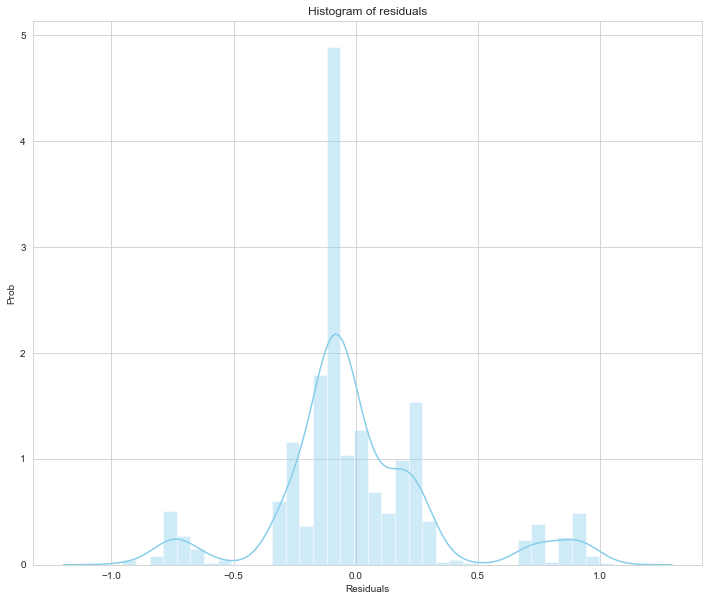

In [168]:
plt.figure(figsize=(12,10))
sns.distplot(Tit_li.residuals, color='skyblue')
plt.title('Histogram of residuals')
plt.ylabel('Prob')
plt.xlabel('Residuals')
plt.show()

# 

#  2_Linearity

**Make scatter plots,**

**x = each continuous predictor
one by one**

**y = response variable**

**see whether a linear relationship is visible?**

In [169]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [170]:
Tit_Li = Tit[:]
Tit_Li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [171]:
numerical_Tl = Tit_Li.select_dtypes(include=np.number)
print(len(numerical_Tl.columns))
numerical_Tl.columns

7


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [172]:
Tit_Li["Sex"].replace("male", 0, inplace = True)
Tit_Li["Sex"].replace("female", 1, inplace = True)

In [173]:
Tit_Li.Sex.value_counts()

0    843
1    466
Name: Sex, dtype: int64

In [174]:
Tit_Li["Embarked"].replace("S", 0 ,inplace = True)
Tit_Li["Embarked"].replace("C", 1 ,inplace = True)
Tit_Li["Embarked"].replace("Q", 2 ,inplace = True)

In [175]:
Tit_Li.Embarked.value_counts()

0    916
1    270
2    123
Name: Embarked, dtype: int64

In [176]:
numerical = Tit_Li.select_dtypes(include=np.number)
print(len(numerical.columns))
numerical.columns

9


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [177]:
### With Good Predictors

a = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [178]:
Tit_pp = Tit_Li[a]

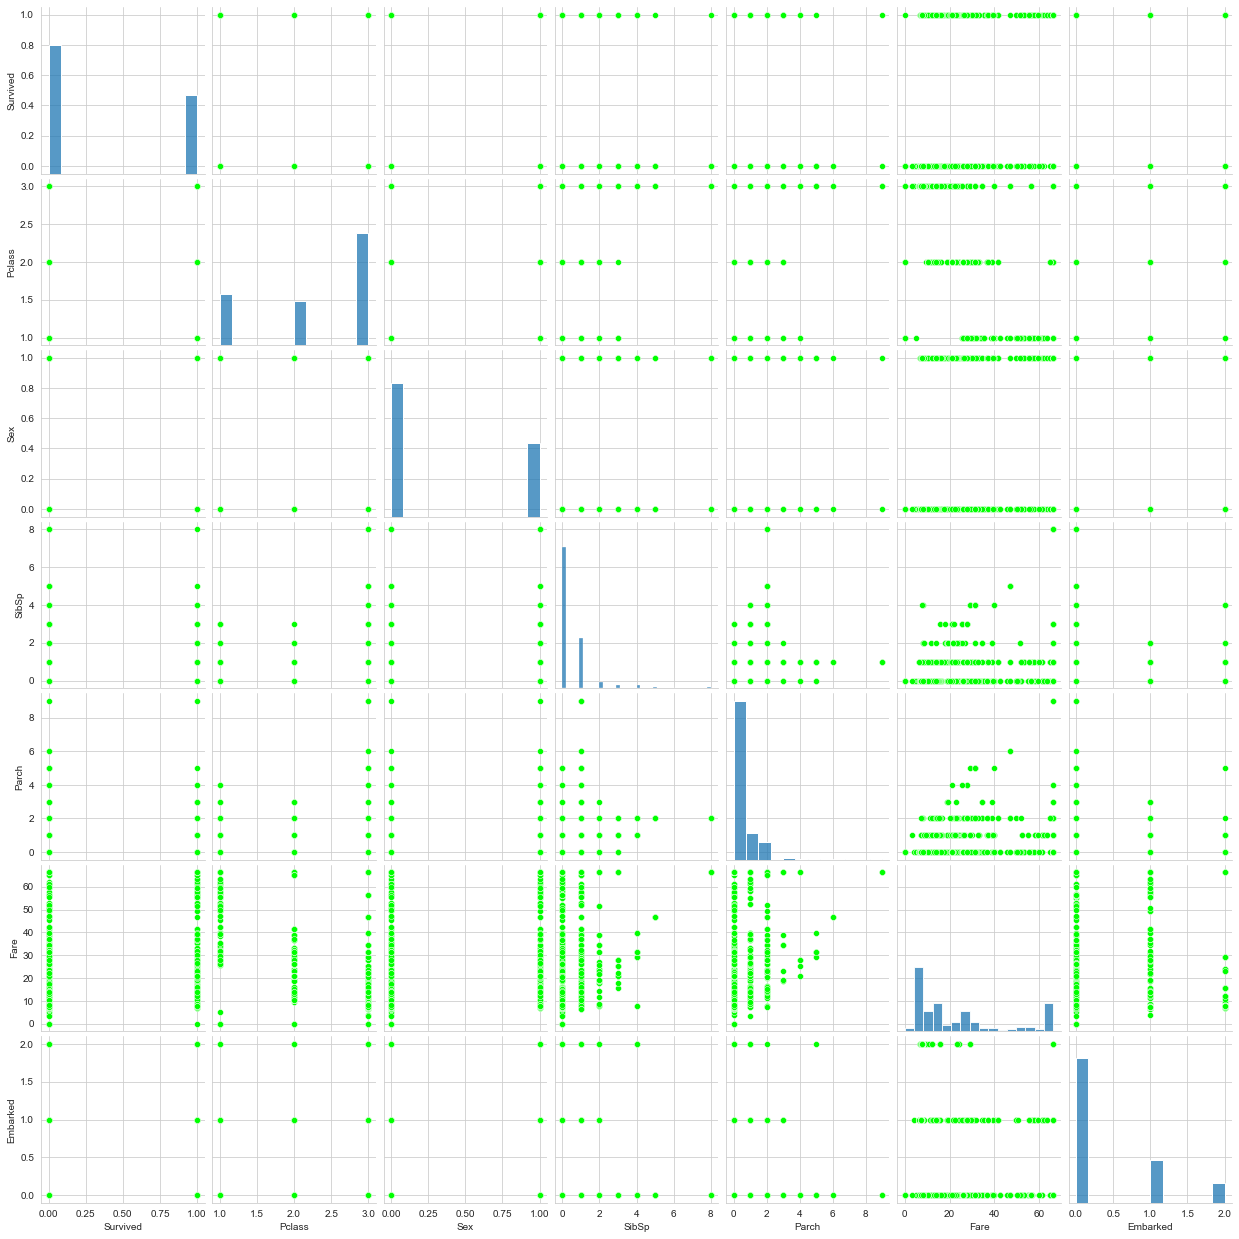

In [179]:
sns.pairplot(Tit_pp ,palette = sns.color_palette('Set3_r'), markers = ['>'], plot_kws = {'facecolors':'#00FF00'})

# 

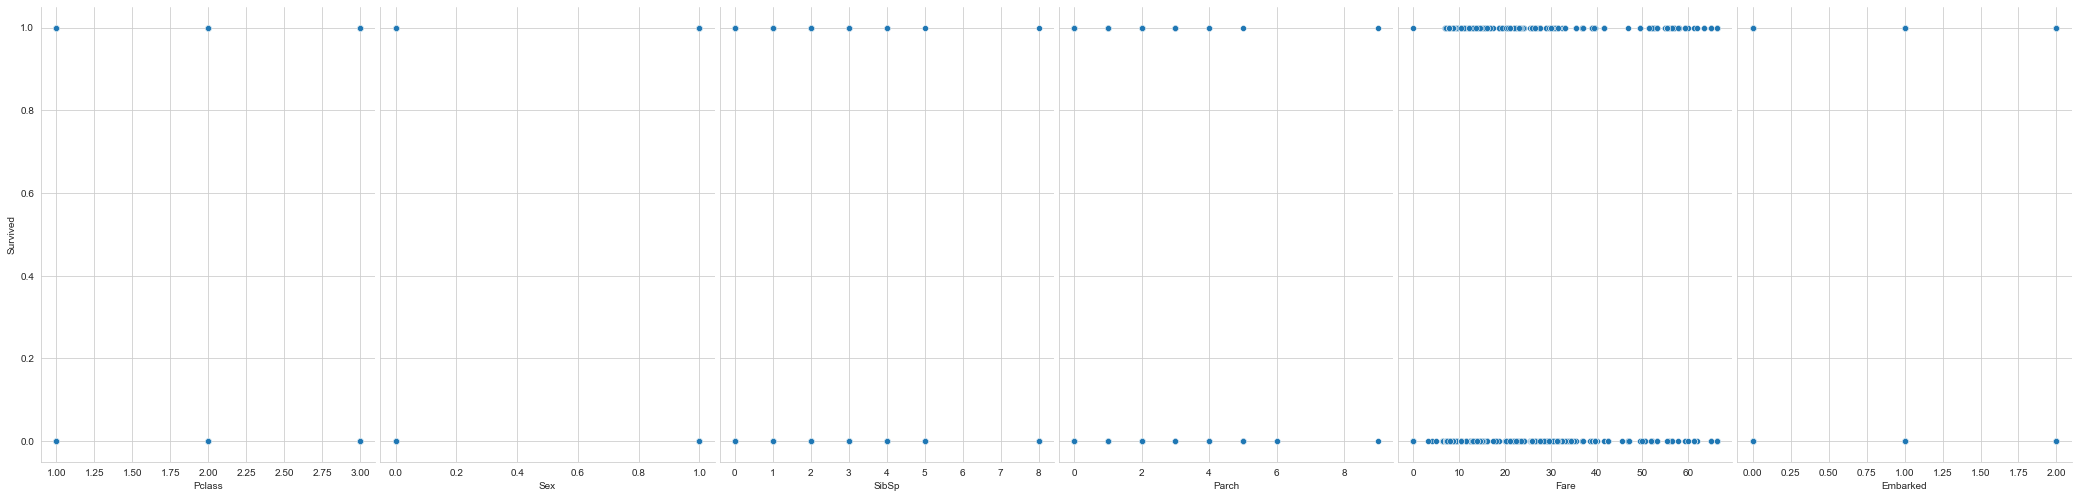

In [180]:
# visualize the relationship between the features and the response using scatterplots

sns.pairplot(Tit_Li, x_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], y_vars = 'Survived', size=7, aspect=0.7)

# 

# 

# 3_Independence of observation
**Make scatter plot,**

**x = obsno**

**y = residuals**

**if, no geometric pattern is visible,
assumption of INDEPENDENCE OF ERROR is holding good and 
not violated**

Text(0.5, 1.0, 'Scatterplot of obsno vs residuals')

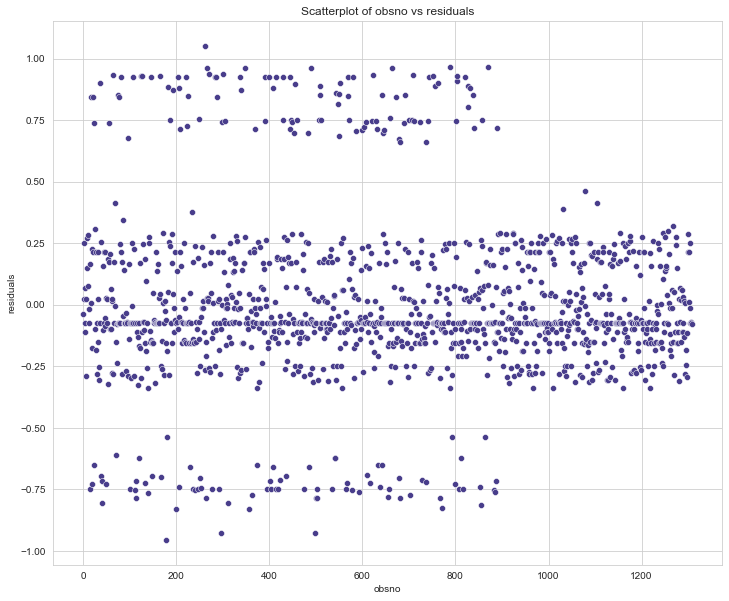

In [181]:
plt.figure(figsize=(12,10))
sns.scatterplot(x = Tit_li.obsno, y = Tit_li.residuals, palette='spring_r', color='darkslateblue', markers='+')
plt.title('Scatterplot of obsno vs residuals')

# 

# 4_Constant Error Variance [homoscadasticity]

**Make scatter plot,**

**x = predict**

**y = residuals**

**if, no geometric pattern is visible,
assumption of homoscadasticity is holding good and 
not violated**


Text(0.5, 1.0, 'Scatterplot of predict vs residuals')

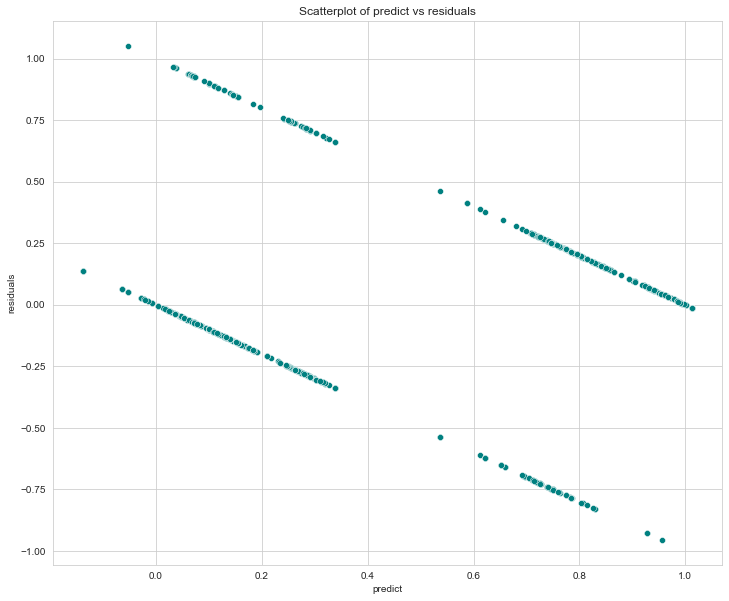

In [182]:
plt.figure(figsize=(12,10))
sns.scatterplot(x = Tit_li.predict, y = Tit_li.residuals, palette='spring', color='teal')
plt.title('Scatterplot of predict vs residuals')

# 

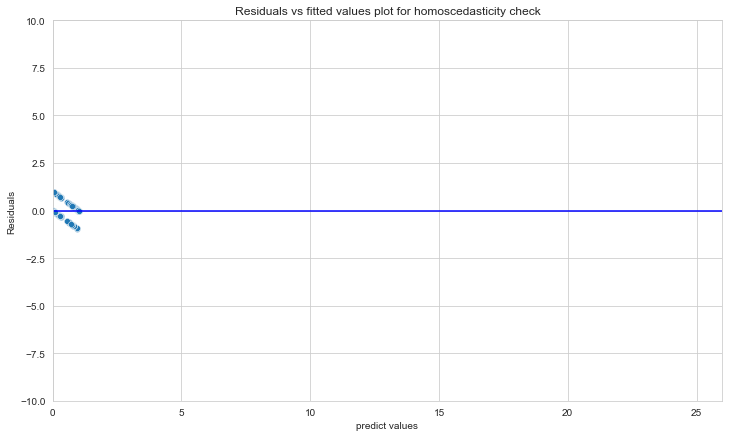

In [183]:
sns.scatterplot(predict, residuals)
plt.xlabel('predict values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# 

# 

# 5_VIF

In [184]:
Tit_Li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 122.8+ KB


In [185]:
x = Tit_Li[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [186]:
x.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [187]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [188]:
# calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
  
print(vif_data)

    feature       VIF
0    Pclass  1.879038
1       Sex  1.701239
2     SibSp  1.561122
3     Parch  1.518446
4      Fare  2.066254
5  Embarked  1.433110


# 

# 6_Durbin Watson

In [189]:
# import numpy and statsmodels

import numpy as np
from statsmodels.stats.stattools import durbin_watson

gfg = durbin_watson(model.resid)


print("Durbin Watson Value :", round(gfx`g, 3))

Durbin Watson Value : 1.963


# 

# 

# Formula for Linear Regression
# Cost Function



# Y = a + bX


**Whrer,**

**a = Model intercept**

**b = Model coefficients for Each X Value**

# 

In [190]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [191]:
# Independant Variables:

X = Tit[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [192]:
# Dependant (Target) Variable:

y = Tit['Survived']
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [194]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (1047, 8)
y_train:  (1047,)
X_test:  (262, 8)
y_test:  (262,)


In [195]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [196]:
# My model's parameters:

print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  0.5452855174253793
Model coefficients:  [-1.54535681e-05 -1.15488530e-01  6.66072505e-01 -5.28475995e-03
 -4.66579808e-02 -5.63618709e-03  1.33679647e-03  1.09094723e-02]


In [197]:
print('y = ' + str('%.2f' % reg.intercept_) + '  ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + 
      '*X2 + ' + str('%.2f' % reg.coef_[2]) + '*X3  ' + str('%.2f' % reg.coef_[3]) + '*X4  ' + str('%.2f' % reg.coef_[4]) + 
      '*X5 ' + str('%.2f' % reg.coef_[5]) + '*X6 + ' + str('%.2f' % reg.coef_[6]) + '*X7 + ' + str('%.2f' % reg.coef_[7]) + 
      '*X8')

y = 0.55  -0.00*X1 -0.12*X2 + 0.67*X3  -0.01*X4  -0.05*X5 -0.01*X6 + 0.00*X7 + 0.01*X8


# 

# 

# Cross Validation Score

In [198]:
y_pred = reg.predict(X_test)


In [199]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, scoring='r2')
print(cross_val_score_train)

[0.49626829 0.5527906  0.55711247 0.56692439 0.49469774]


In [200]:
# Cross Validation Mean Score

cross_val_score_train.mean()

0.5335586993666114

# 

# 

# MSE & RMSE

In [201]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y ,predict)
print("Mean Squared Error (MSE) :", round(MSE, 3))

Mean Squared Error (MSE) : 0.115


# 

In [202]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE) :", round(RMSE, 3))

Root Mean Squared Error (RMSE) : 0.338


# 

# 

# 

# 

# 

# (3) 3rd Part

# Visualization of the Titanic Dataset

# For Only Train Data

In [301]:
import plotly.express as px

train = pd.read_csv('train.csv')

train['Survived'] = np.where(train['Survived'] == 1, 'Survived', 'Dead')
train.loc[(train.Pclass == 3), 'Pclass'] = 'Third Class'
train.loc[(train.Pclass == 2), 'Pclass'] = 'Second Class'
train.loc[(train.Pclass == 1), 'Pclass'] = 'First Class'
train['Sex'] = np.where(train['Sex'] == 'male', 'Male', 'Female')

fig = px.sunburst(data_frame=train, # Our dataset
                  path=["Pclass", "Sex", "Survived"],  # Root, Branches, Leaves
                  color="Pclass",
                  color_discrete_map={'First Class': 'rgb(246,207,113)',
                                      'Second Class': 'rgb(248,156,116)',
                                      'Third Class': 'rgb(102,197,204)'},  # Colours (could be changed easily)
                  maxdepth=-1,
                  branchvalues='total',
                  hover_name='Pclass',  # Hover name for chosen column
                  hover_data={'Pclass': False},
                  title='Visualization of the Titanic Dataset', template='ggplot2'# Title and the template 
                  )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(font=dict(size=16))
fig.show()

# 

# For Whole Data

In [3]:
import plotly.express as px

Titanic = pd.read_csv('Titanic.csv')

Titanic['Survived'] = np.where(Titanic['Survived'] == 1, 'Survived', 'Dead')
Titanic.loc[(Titanic.Pclass == 3), 'Pclass'] = 'Third Class'
Titanic.loc[(Titanic.Pclass == 2), 'Pclass'] = 'Second Class'
Titanic.loc[(Titanic.Pclass == 1), 'Pclass'] = 'First Class'
Titanic['Sex'] = np.where(Titanic['Sex'] == 'male', 'Male', 'Female')

fig = px.sunburst(data_frame = Titanic, # Our dataset
                  path=["Pclass", "Sex", "Survived"],  # Root, Branches, Leaves
                  color="Pclass",
                  color_discrete_map={'First Class': 'rgb(246,207,113)',
                                      'Second Class': 'rgb(248,156,116)',
                                      'Third Class': 'rgb(102,197,204)'},  # Colours (could be changed easily)
                  maxdepth=-1,
                  branchvalues='total',
                  hover_name='Pclass',  # Hover name for chosen column
                  hover_data={'Pclass': False},
                  title='Visualization of the Titanic Dataset', template='ggplot2'# Title and the template 
                  )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(font=dict(size=16))
fig.show()

# 

# 

# 

# 

# 

# (4) 4th Part

# Logistic Regression Model

# 

In [203]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [204]:
x = Tit[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [205]:
y = Tit["Survived"]
y.sample(10)

243     0
790     0
856     1
1053    1
446     1
1251    0
1130    1
806     0
329     1
387     1
Name: Survived, dtype: int64

In [206]:
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 19)

In [208]:
x_train

Pclass Sex    Age  SibSp  Parch     Fare Embarked
490        3   0  25.96      1      0  19.9667        0
763        1   1  36.00      1      2  66.3438        0
38         3   1  18.00      2      0  18.0000        0
841        2   0  16.00      0      0  10.5000        0
16         3   0   2.00      4      1  29.1250        2
...      ...  ..    ...    ...    ...      ...      ...
308        2   0  30.00      1      0  24.0000        1
1043       3   0  59.50      0      0  14.4542        0
936        3   0  25.00      0      0   7.9250        0
757        2   0  18.00      0      0  11.5000        0
622        3   0  20.00      1      1  15.7417        1

[1047 rows x 7 columns]

In [209]:
y_train

490     0
763     1
38      0
841     0
16      0
       ..
308     0
1043    0
936     0
757     0
622     1
Name: Survived, Length: 1047, dtype: int64

In [210]:
logreg_Tit = LogisticRegression()
logreg_Tit.fit(x_train, y_train)

LogisticRegression()

In [211]:
y_predict = logreg_Tit.predict(x_test)

# 

# Feature ranking with recursive feature elimination and Cross - Validation

In [212]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(estimator = LogisticRegression(), step = 1, cv = 10, scoring = 'accuracy')
rfecv.fit(x, y)

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [213]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x.columns[rfecv.support_]))

Optimal number of features: 5
Selected features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


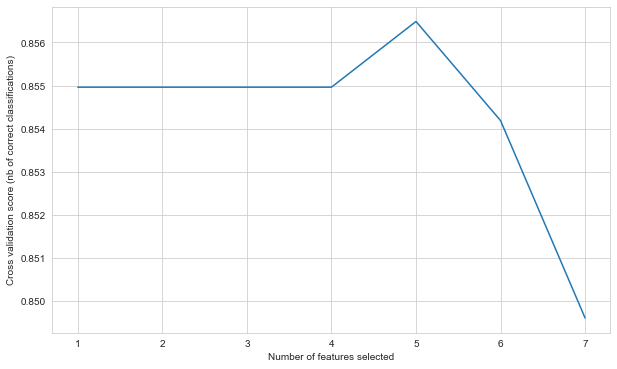

In [214]:
# Plot number of features VS. cross-validation scores

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# 

# Confusion Matrix

In [215]:
pd.crosstab(y_test, y_predict, rownames = ["Actual"], 
            colnames = ["Predicted"], margins = True)

Predicted    0   1  All
Actual                 
0          150  10  160
1           22  80  102
All        172  90  262

In [216]:
confusion_matrix(y_test, y_predict)

array([[150,  10],
       [ 22,  80]], dtype=int64)

# 

# f1_score

In [217]:
import numpy as np
from sklearn.metrics import f1_score

In [218]:
#define array of actual classes

actual = np.repeat([1, 0], repeats=[160, 102])

In [219]:
#define array of predicted classes

pred = np.repeat([1, 0, 1, 0], repeats=[150, 10, 22, 80])

In [220]:
#calculate F1 score

f1_score(actual, pred)

0.9036144578313252

**Use of F1 score to compare several models, the model with the highest F1 score**

**represents the model that is best able to classify observations into classes.**

# 

# Classification Report

In [221]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       160
           1       0.89      0.78      0.83       102

    accuracy                           0.88       262
   macro avg       0.88      0.86      0.87       262
weighted avg       0.88      0.88      0.88       262



# 

# Accuracy Score

In [222]:
lg = accuracy_score(y_test, y_predict)
print('Accuracy Score:', round(lg, 3))

Accuracy Score: 0.878


# 

# AUC Value

In [223]:
y_predict = logreg_Tit.predict_proba(x)
y_predict[:,1]
plt.show()

In [224]:
#ROC Curve - Receiver Operating Characteristic curve
### threshold
#tpr = True Positive Rate 
#fpr = False Positive Rate

from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds =roc_curve(y, y_predict[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))

AUC Score :  0.899


# 

# ROC Curve

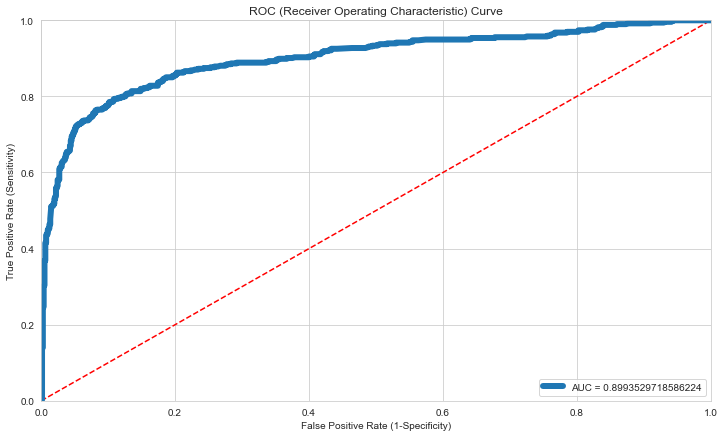

In [225]:
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

# 

# 

# 

# 

# 

# (5) 5th Part

# Decision Tree

# 

In [226]:
Tit_Li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 122.8+ KB


In [227]:
X = Tit_Li[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


In [228]:
y = Tit_Li['Survived']
y.sample(10)

264     0
444     1
801     1
49      0
627     1
609     1
1050    1
950     1
1024    0
1149    1
Name: Survived, dtype: int64

In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 26)

In [230]:
len(X_train)

1047

In [231]:
len(y_train)

1047

In [232]:
len(X_test)

262

In [233]:
len(y_test)

262

# 

# Decision Tree Classifier

# 

In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [235]:
# Create Decision Tree classifer object

clf = DecisionTreeClassifier()

In [236]:
# Train Decision Tree Classifer

clf = clf.fit(X_train,y_train)

In [237]:
#Predict the response for test dataset

y_pred = clf.predict(X_test)

[Text(362.4647965116279, 373.20230769230767, 'X[2] <= 0.5\ngini = 0.473\nsamples = 1047\nvalue = [645, 402]'),
 Text(170.56308139534886, 358.56692307692305, 'X[0] <= 890.5\ngini = 0.243\nsamples = 677\nvalue = [581, 96]'),
 Text(164.33424418604653, 343.9315384615384, 'X[3] <= 6.5\ngini = 0.329\nsamples = 463\nvalue = [367, 96]'),
 Text(58.7846511627907, 329.29615384615386, 'X[4] <= 2.5\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(52.555813953488375, 314.66076923076923, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(65.01348837209302, 314.66076923076923, 'X[6] <= 31.331\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(58.7846511627907, 300.0253846153846, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(71.24232558139535, 300.0253846153846, 'X[4] <= 4.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(65.01348837209302, 285.39, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(77.47116279069768, 285.39, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(269.883837209302

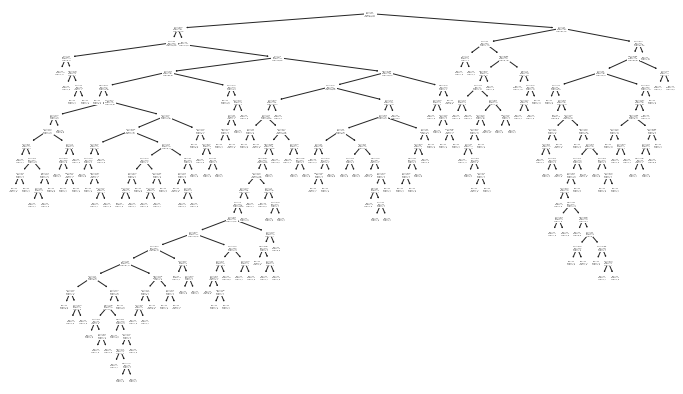

In [238]:
#See the train

tree.plot_tree(clf)

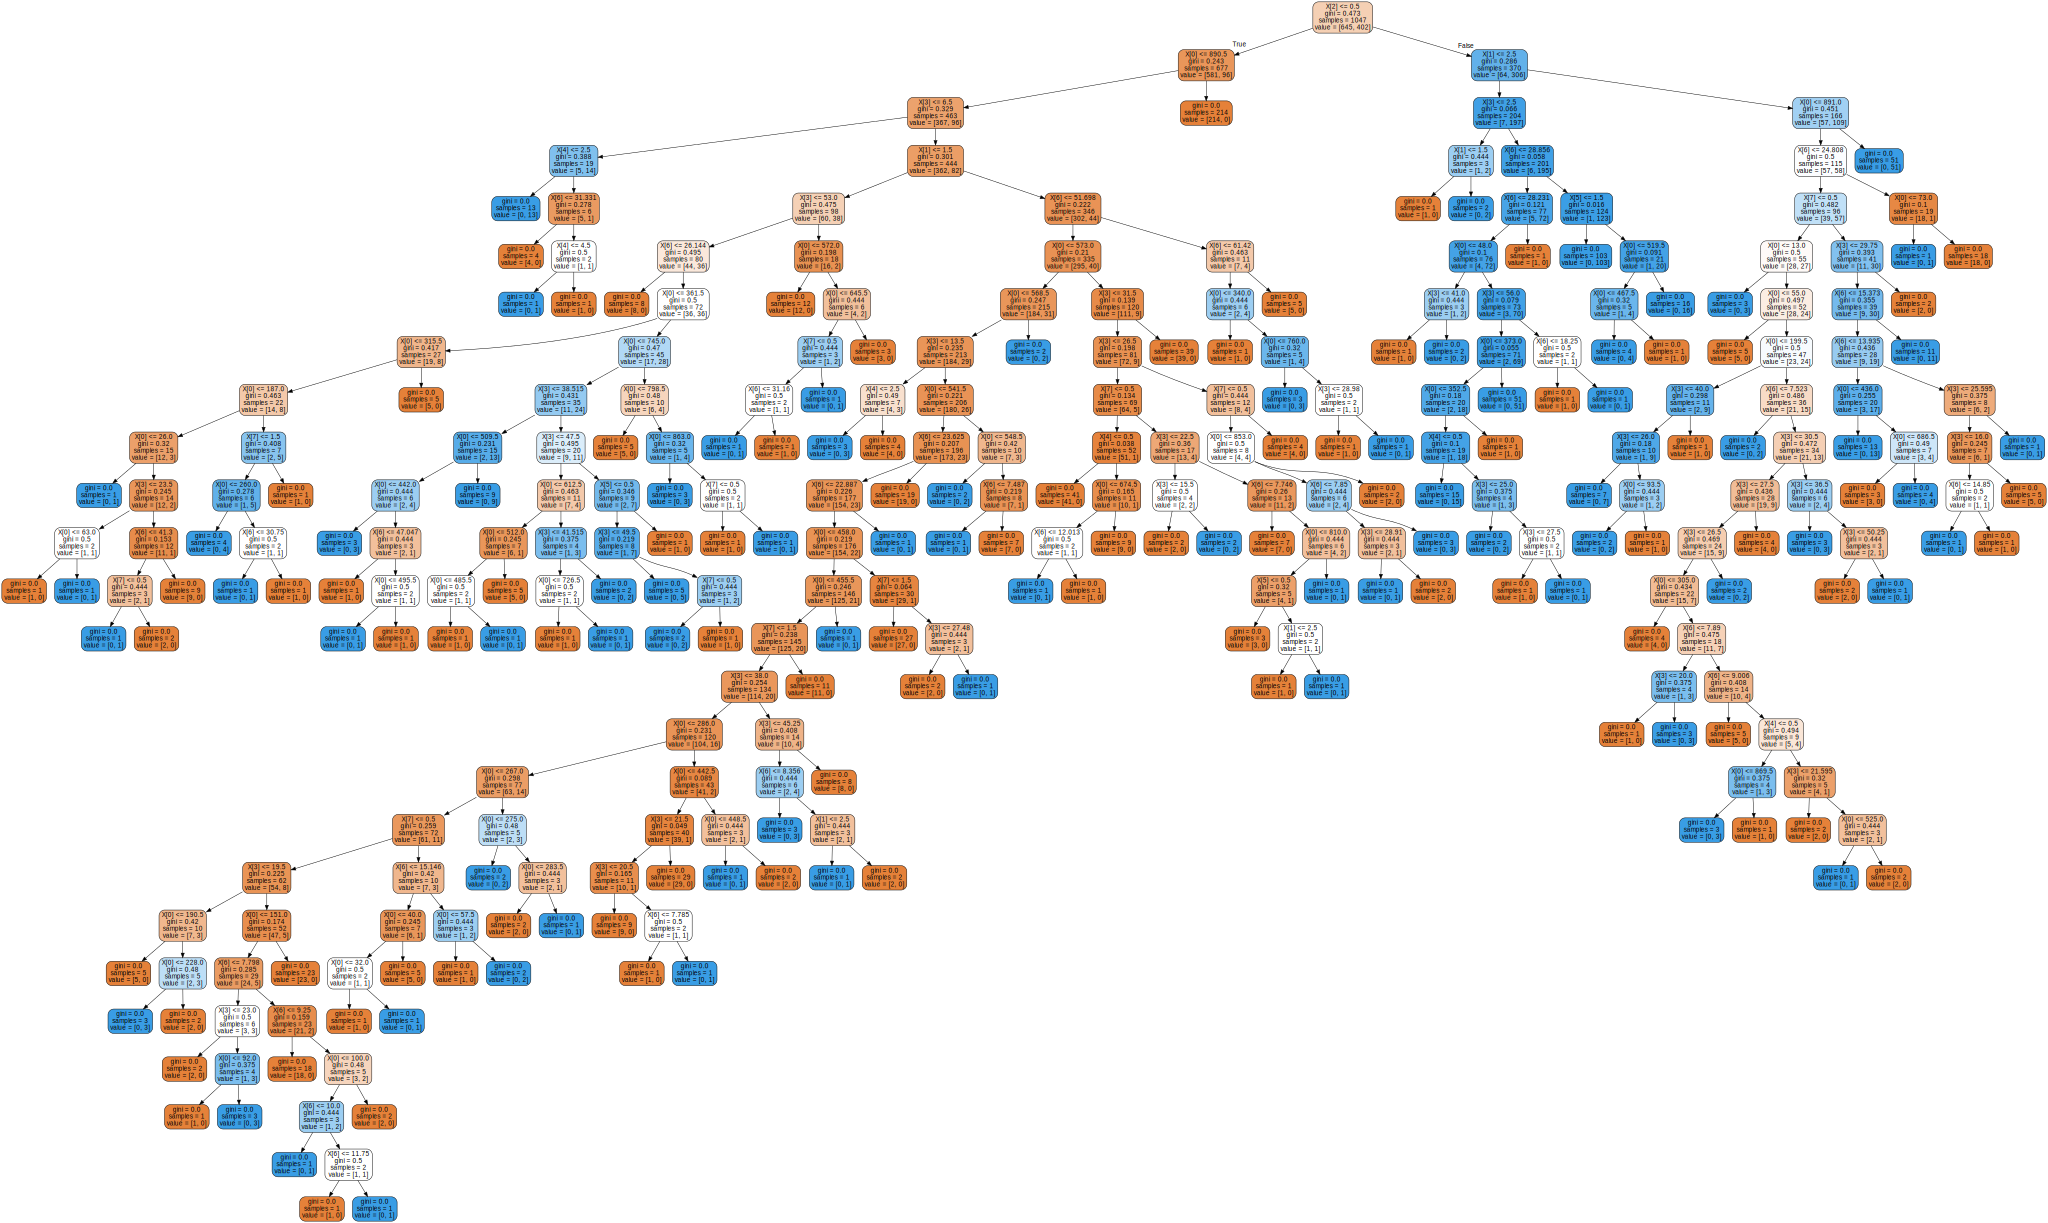

In [239]:
import graphviz

dot_data2 = tree.export_graphviz(clf, out_file = None, filled = True, rounded = True)
graph2 = graphviz.Source(dot_data2)
graph2.render("Tit1")
graph2

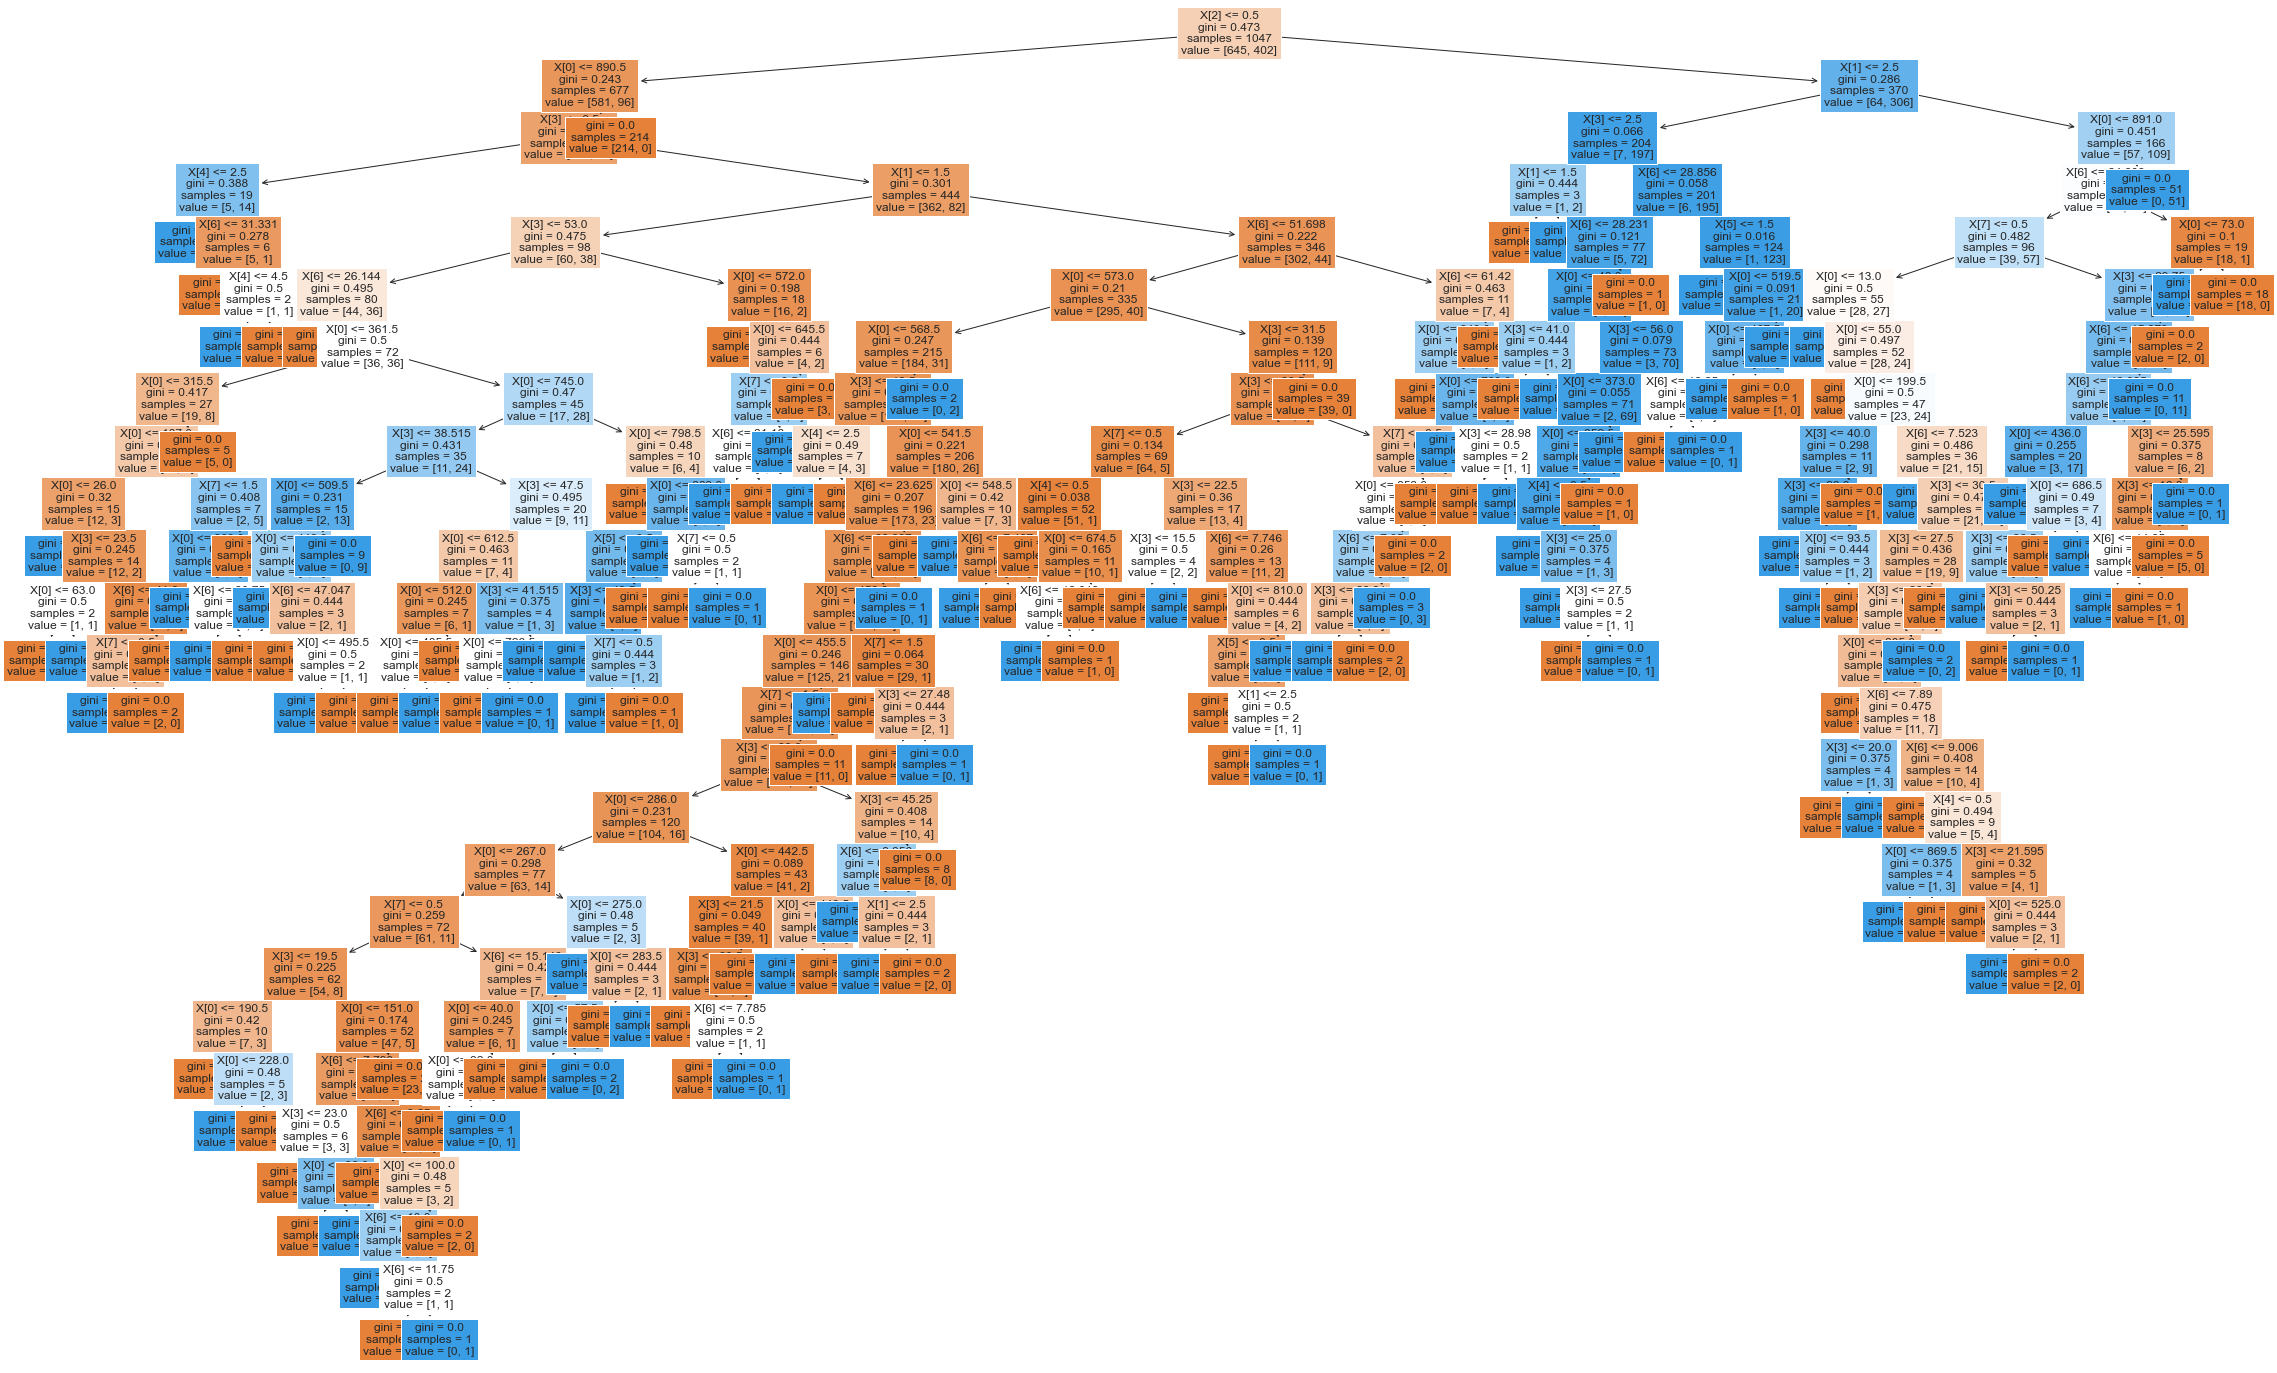

In [240]:
fig, ax = plt.subplots(figsize = (40,25))
tree.plot_tree(clf, ax = ax, fontsize = 12, filled = True)
plt.show()

# 

# 

# ''' Train depths '''

# 

In [241]:
yest = clf.predict(X)

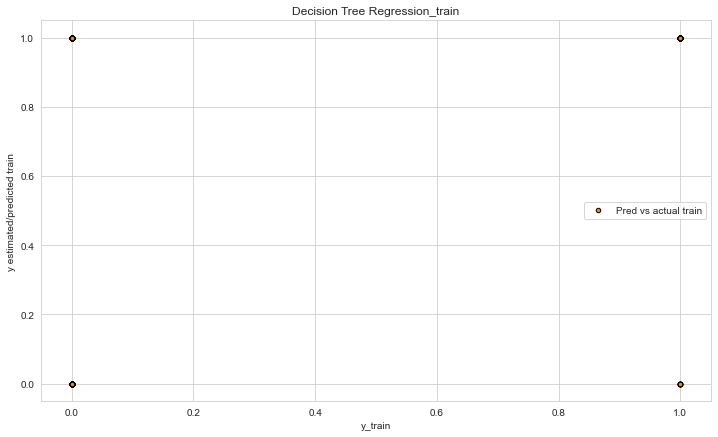

In [242]:
#Plot the results; looks like model has learnt everything!

plt.figure()
plt.scatter(y, yest, s=20, edgecolor = 'black',
            c = "darkorange", label ="Pred vs actual train")
plt.xlabel("y_train")
plt.ylabel("y estimated/predicted train")
plt.title("Decision Tree Regression_train")
plt.legend()
plt.show()

# 

In [243]:
yest_train = clf.predict(X_train)

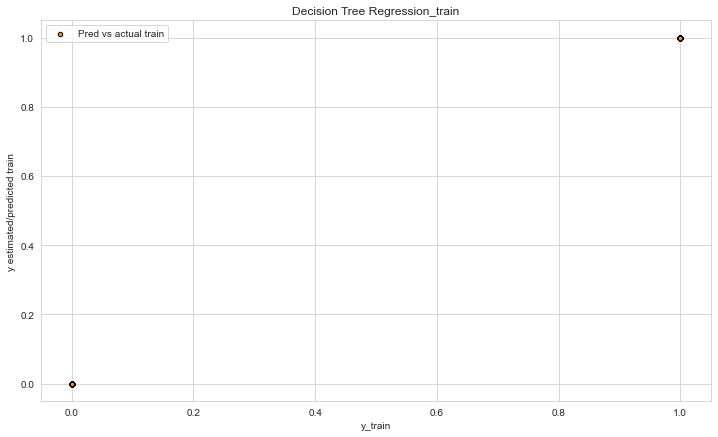

In [244]:
#Plot the results; looks like model has learnt everything!

plt.figure()
plt.scatter(y_train, yest_train, s=20, edgecolor = 'black',
            c = "darkorange", label ="Pred vs actual train")
plt.xlabel("y_train")
plt.ylabel("y estimated/predicted train")
plt.title("Decision Tree Regression_train")
plt.legend()
plt.show()

# 

In [245]:
Tit_Li['yest'] = yest

Text(0.5, 1.0, 'Scatter Plot')

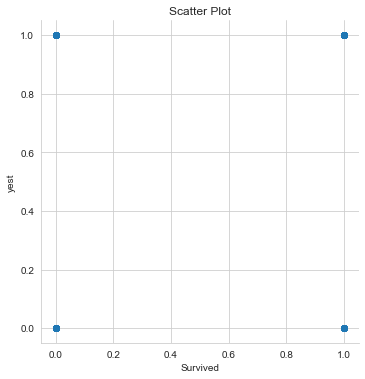

In [246]:
sns.lmplot(x = 'Survived', y = 'yest', data = Tit_Li, fit_reg=False)
plt.title('Scatter Plot')

# 

# Accuracy Of train & test

# 

In [247]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)


In [248]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train, y_train_pred), 2))
print(round(accuracy_score(y_test, y_test_pred), 2)) 


1.0
0.84


# 

# ccp_alphas

In [249]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00050939, 0.00060323, 0.00062082, 0.00062449,
       0.0006316 , 0.00063674, 0.00063674, 0.00063674, 0.00071633,
       0.00071633, 0.00076409, 0.00076409, 0.00079592, 0.00079592,
       0.00080817, 0.00081867, 0.00081867, 0.00081867, 0.00081867,
       0.00083572, 0.0008596 , 0.00089014, 0.00090484, 0.00092327,
       0.00094479, 0.00101878, 0.00101878, 0.00101878, 0.00106123,
       0.00113704, 0.00114613, 0.00118707, 0.00119596, 0.0011996 ,
       0.00122586, 0.001228  , 0.00125543, 0.00130001, 0.00130986,
       0.00137648, 0.00140662, 0.00153927, 0.00168534, 0.00172021,
       0.00180968, 0.00191908, 0.00213459, 0.00213887, 0.00243553,
       0.00254618, 0.00260175, 0.00336206, 0.0054458 , 0.00887146,
       0.00990626, 0.01061121, 0.01201904, 0.01658049, 0.01669955,
       0.21458204])

In [250]:
accuracy_train, accuracy_test = [],[]
for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
print('accuracy_train :', accuracy_train)
print('')
print('accuracy_test :', accuracy_test)

accuracy_train : [1.0, 1.0, 0.9990448901623686, 0.997134670487106, 0.9961795606494747, 0.9952244508118434, 0.9923591212989494, 0.9933142311365807, 0.9923591212989494, 0.9923591212989494, 0.9923591212989494, 0.9885386819484241, 0.9894937917860553, 0.9866284622731614, 0.9875835721107927, 0.9856733524355301, 0.9828080229226361, 0.9808978032473734, 0.9799426934097422, 0.9808978032473734, 0.9808978032473734, 0.9799426934097422, 0.9789875835721108, 0.9732569245463228, 0.9723018147086915, 0.9723018147086915, 0.9703915950334289, 0.9694364851957975, 0.9694364851957975, 0.9675262655205349, 0.9675262655205349, 0.9646609360076409, 0.9627507163323782, 0.9646609360076409, 0.958930276981853, 0.9579751671442216, 0.9579751671442216, 0.933142311365807, 0.9321872015281757, 0.9312320916905444, 0.9293218720152817, 0.9283667621776505, 0.9255014326647565, 0.9207258834765998, 0.9178605539637058, 0.9169054441260746, 0.9102196752626552, 0.9054441260744985, 0.8958930276981852, 0.8930276981852913, 0.8872970391595

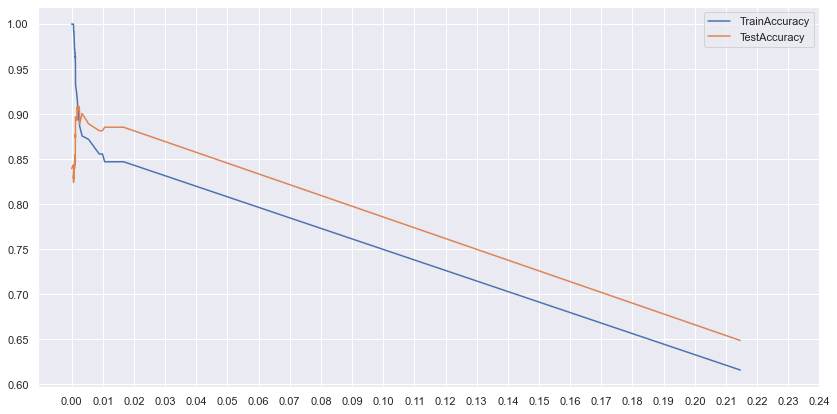

In [251]:
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y = accuracy_train, x = alphas, label = 'TrainAccuracy')
sns.lineplot(y = accuracy_test, x = alphas, label = 'TestAccuracy')
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

# 

# After ccp_alpha accuracy score of train & test

# 

In [252]:
tree = DecisionTreeClassifier(ccp_alpha = 0.01,random_state=40)
tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train, y_train_pred), 2))
print(round(accuracy_score(y_test, y_test_pred), 2))

0.86
0.88


# 

# Logistic & Decision Tree ROC Curve

# 

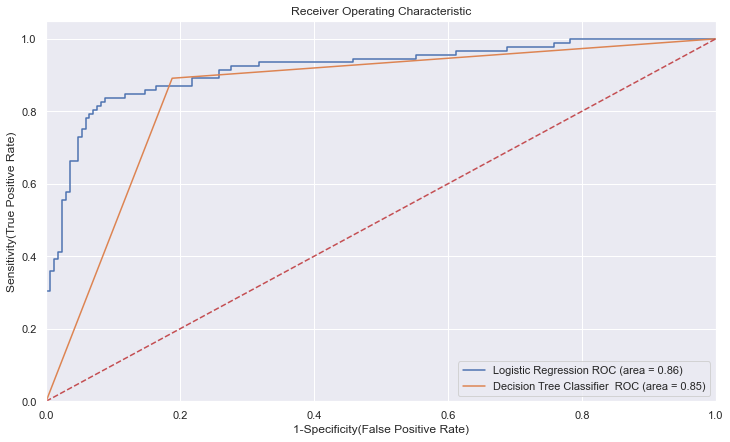

In [253]:
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Decision Tree Classifier ',
    'model': DecisionTreeClassifier(),
}
]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 

# 

# Grid Search

In [254]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [255]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['auto', 'sqrt', 'log2', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [256]:
rf_model = RandomForestClassifier(random_state = 1)

In [257]:
clf = GridSearchCV(rf_model, model_params, cv = 5)

In [258]:
model = clf.fit(X, y)

In [259]:
from pprint import pprint

In [260]:
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


# 

# 

# Decision Tree Classifier with criterion gini index

In [261]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [262]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [263]:
y_pred_gini = clf_gini.predict(X_test)

In [264]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9046


In [265]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [266]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8797


In [267]:
# Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8797
Test set score: 0.9046


# 

# 

# Decision Tree Classifier with criterion entropy

In [268]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [269]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [270]:
y_pred_en = clf_en.predict(X_test)

In [271]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9084


In [272]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [273]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8758


In [274]:
# Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8758
Test set score: 0.9084


# 

# 

# 

# 

# 

# (6) 6th Part

# Random Forest classifier

In [278]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [279]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [280]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


In [281]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [282]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 29)

In [283]:
classifier = RandomForestClassifier(n_estimators = 150, max_depth = 8, random_state = 18)

In [284]:
clf_mod = classifier.fit(x_train , y_train)

In [285]:
y_pred = clf_mod.predict(x_test)

In [286]:
## For getting accuracy_score

print(accuracy_score(y_test, y_pred))

0.8778625954198473


# 

# 

# 

# 

# 

# (7) 7th Part

# Ada Boost

In [287]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [288]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


In [289]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [290]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [291]:
abc = AdaBoostClassifier(n_estimators = 150, learning_rate=1)
ada_boost_model = abc.fit(X_train, Y_train)

In [292]:
y_pred = ada_boost_model.predict(X_test)

In [293]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8664122137404581


# 

# 

# 

# 

# 

# (8) 8th Part

# xg Boost

In [295]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [296]:
xgb_cl = xgb.XGBClassifier()

In [297]:
xgb_cl.fit(X_train, Y_train)

[09:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [298]:
preds = xgb_cl.predict(X_test)

In [299]:
print("Accuracy Score :", accuracy_score(Y_test, preds))

Accuracy Score : 0.8664122137404581
